# Footnote Visualizations

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

footnotes_df = pd.read_csv('../../../../Dropbox/Footnote article/Data Manifests/ECCOFictionTXTLab.csv', encoding='utf-8', parse_dates=True)

## Table of Contents:
    
1. [Visualizations of ECCOFictionTXTLab.csv (without annotations)](#1.-Visualizations-of-ECCOFictionTXTLab.csv-(without-annotations))
2. [One Footnote Subset](#2.-One-Footnote-Subset)
    - [Evaluation of model performance by decade and date](#Evaluation-of-model-performance-by-decade-and-date) 
3. [One Footnote Subset, with tags](#3.-One-Footnote-Subset,-with-tags)
    - [Model metrics: tagged one-footnote subset](#Model-metrics:-tagged-one-footnote-subset)
    - [Visualization of the number of footnoted and unfootnoted pages for each tag](#Visualization-of-the-number-of-footnoted-and-unfootnoted-pages-for-each-tag)
    - [Plot the counts of each combination of tags in our dataset](#Plot-the-counts-of-each-combination-of-tags-in-our-dataset)
    - [Stats on our tagged one-footnote dataset](#Stats-on-our-tagged-one-footnote-dataset)
    - [Analysis of tags and clusters of tags](#Analysis-of-tags-and-clusters-of-tags)
        - [Metatextual Footnotes](#Metatextual-Footnotes)
        - [Intertextual Footnotes](#Intertextual-Footnotes)
        - [Intratextual Footnotes](#Intratextual-Footnotes)
        - [Contextual Footnotes](#Contextual-Footnotes)
        - [Translation Footnotes](#Translation-Footnotes)
        - [Multi-tagged pages](#Multi-tagged-pages)
            - [Plot of all tag combinations](#Plot-the-counts-of-each-combination-of-tags-in-our-dataset)
            - [Plot of top 25 tag combinations in multi- and double-tagged footnotes](#Top-25-Tag-Combinations-for-multiple-tags-and-double-tagged-footnotes)
    - [Decade-by-decade breakdown of tags](#Decade-by-decade-breakdown-of-tags)
    - [Decade-level analysis of all tags](#Decade-level-analysis)
    - [Visualizations of where single footnotes appear in our one-footnote dataset](#Visualizations-of-where-single-footnotes-appear-in-our-one-footnote-dataset)
        - [Statistical tests](#Statistical-comparison-of-volume-distribution-in-one-footnote-subset-with-footnotes-not-in-one-footnote-subset)
4. [Footnote positions in END data](#Footnote-positions-in-END-data)
    - [Where are footnotes positioned within volumes?](#Where-are-footnotes-positioned-within-volumes?)
    - [Locations of footnotes within END volumes](#Locations-of-footnotes-within-END-volumes)
    - [Top 25 locations for footnotes in END volumes](#Top-25-locations-for-footnotes-in-END-volumes)
    - [Plotting locations for footnotes in END volumes, binning by 10](#Plotting-locations-for-footnotes-in-END-volumes,-binning-by-10)

## 1. Visualizations of ECCOFictionTXTLab.csv (without annotations)
This first section of visualizations aim to give an overview of our dataset as a whole. As such, they use only the ECCOFictionTXTLab.csv.

The footnote-detection models were run on an an initial corpus of 8607 volumes of fiction comprising 5686 works of fiction (8607 documents, 5685 ESTC_ids.)  See list in ECCOFictionTXTLab.csv. These works were identifed in ECCO using a classifier built by txtLab collaborators based on the Stanford/Mark Algee-Hewitt list of 1579 works of fiction in ECCO.

### Data Dictionary

`Filename`: name of XML file for volume  	
`DocumentID`: ECCO identifier 	
`ESTC_ID`: EST identifier 	
`Date`: Date of publication 	
`Title`: Title of work 	
`Vol_Number`: Volume number 	
`Author` : Author Name	
`Imprint` : Publication imprint information	
`Field_Headings` : ECCO subject headings 	
`fn_pages`: number of pages with footnotes predicted by the model's four machine learning and classification algorithms
`nofn_pages`: number of pages with no footnotes predicted by the model's four machine learning and classification algorithms 	
`TableName`: Name of metadata table 	
`fn.percent`: percentage of pages with footnotes predicted 	


In [246]:
# Let's look at the first 5 rows of ECCOFictionTXTLab.csv data
footnotes_df.head(5)

,Unnamed: 0,Filename,DocumentID,ESTC_ID,Date,Title,Vol_Number,Author,Imprint,Field_Headings,fn_pages,nofn_pages,TableName,fn.percent,decade
0,1,0003900900.xml,3900900,T110586,1753,"Memoires secrets pour servir <c3><a0> l'histoire de notre tems, miss [sic] au jour par M. M. C. ...",0,"M. M. C. F., Ecu<c3><a8>ier","London : printed for R. Jennys, [1753?].","French fiction, 18th century",0,30,Manifest_HistAndGeo,0.000000,1750
1,2,0004700401.xml,4700401,T125094,1748,Anecdotes de la cour de Fran<c3><a7>ois I. Par Mlle de Lussan. ...,Volume 1,"Lussan, Marguerite de","Londres [i.e. Paris?] : chez Jean Nours [sic], 1748.","France, Court and courtiers, France, History, Francis I, 1515-1547, Fiction",0,304,Manifest_HistAndGeo,0.000000,1740
2,3,0004700402.xml,4700402,T125094,1748,Anecdotes de la cour de Fran<c3><a7>ois I. Par Mlle de Lussan. ...,Volume 2,"Lussan, Marguerite de","Londres [i.e. Paris?] : chez Jean Nours [sic], 1748.","France, Court and courtiers, France, History, Francis I, 1515-1547, Fiction",1,343,Manifest_HistAndGeo,0.002907,1740
3,4,0004700403.xml,4700403,T125094,1748,Anecdotes de la cour de Fran<c3><a7>ois I. Par Mlle de Lussan. ...,Volume 3,"Lussan, Marguerite de","Londres [i.e. Paris?] : chez Jean Nours [sic], 1748.","France, Court and courtiers, France, History, Francis I, 1515-1547, Fiction",0,309,Manifest_HistAndGeo,0.000000,1740
4,5,0007901400.xml,7901400,T069692,1782,"The history of the civil wars in Germany, from the year 1630 to 1635: also, genuine memoirs of t...",0,"Defoe, Daniel","Newark : printed by James Tomlinson, for the publisher, in 1782.","Thirty Years' War, 1618-1648, Fiction, Great Britain, History, Civil War, 1642-1649, Fiction",2,379,Manifest_HistAndGeo,0.005249,1780


In [247]:
# Add a new column to the dataframe called "Footnotes_predicted", which will read "True" if fn_pages are not 0
footnotes_df.loc[footnotes_df['fn_pages'] > 0, 'Footnotes_predicted'] = 'True' 

In [248]:
# Fix a date error 
footnotes_df = footnotes_df.replace(to_replace=5480,
                     value=1710)
footnotes_df['Date'].max()

1809

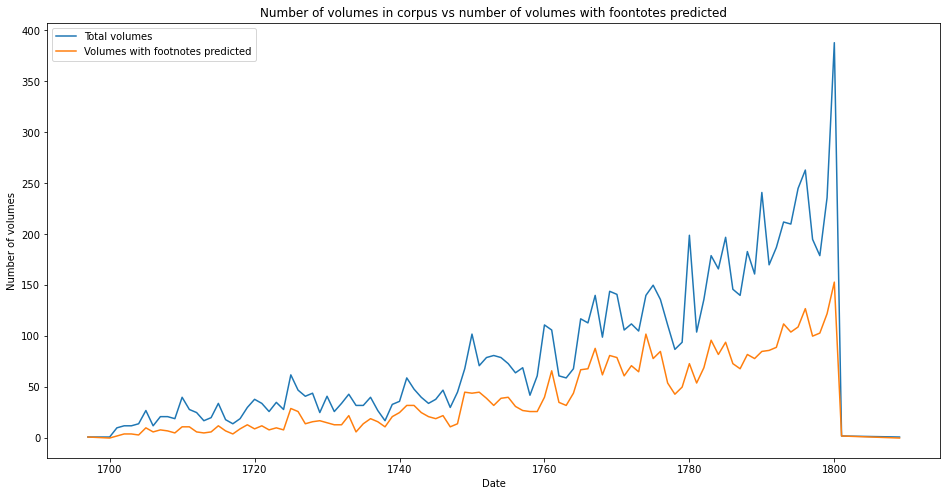

In [249]:
# Plot a time series of the total volumes in our dataset vs. the total volumes identified as having footnotes
# so that we can compare trends
footnotes_df.groupby('Date')[['DocumentID', 'Footnotes_predicted']].count().plot(title="Number of volumes in corpus vs number of volumes with foontotes predicted", figsize=(16,8))\
.set_ylabel("Number of volumes")
plt.legend(["Total volumes", "Volumes with footnotes predicted"])

### Stats on the ECCO dataset

In [250]:
print("Number of volumes in our ECCO dataset:")
footnotes_df['DocumentID'].count()

Number of volumes in our ECCO dataset:


8606

In [251]:
# Calculate the total number of volumes with footnotes present, according to the machine learning classification algorithms
print("Total number of volumes with at least one page of predicted footnotes,")
print("(according to the machine learning and classification algorithms):")
footnotes_df.Footnotes_predicted.count()

Total number of volumes with at least one page of predicted footnotes,
(according to the machine learning and classification algorithms):


4260

Text(0, 0.5, 'Number of pages')

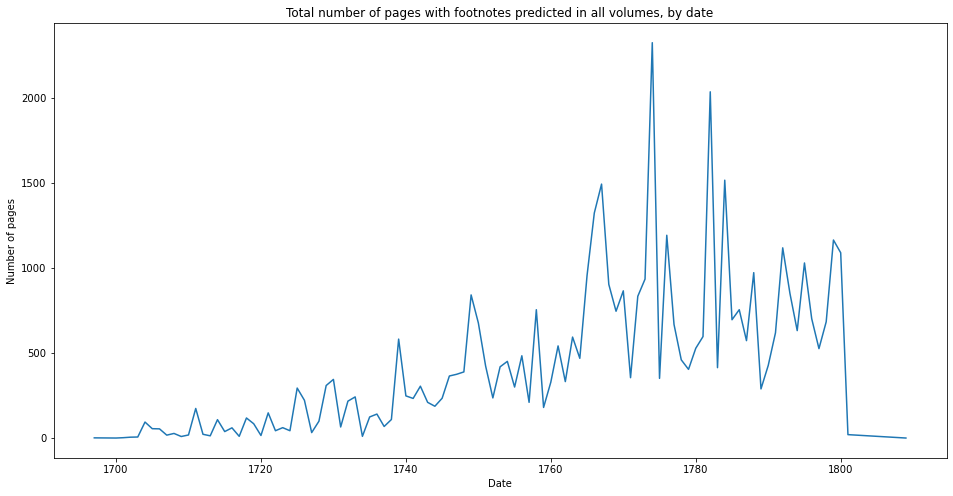

In [252]:
# Plot a time series of the total number of footnoted pages in all volumes
footnotes_df.groupby('Date')['fn_pages'].sum().plot(title="Total number of pages with footnotes predicted in all volumes, by date", figsize=(16,8)).set_ylabel("Number of pages")

Text(0, 0.5, 'Number of pages')

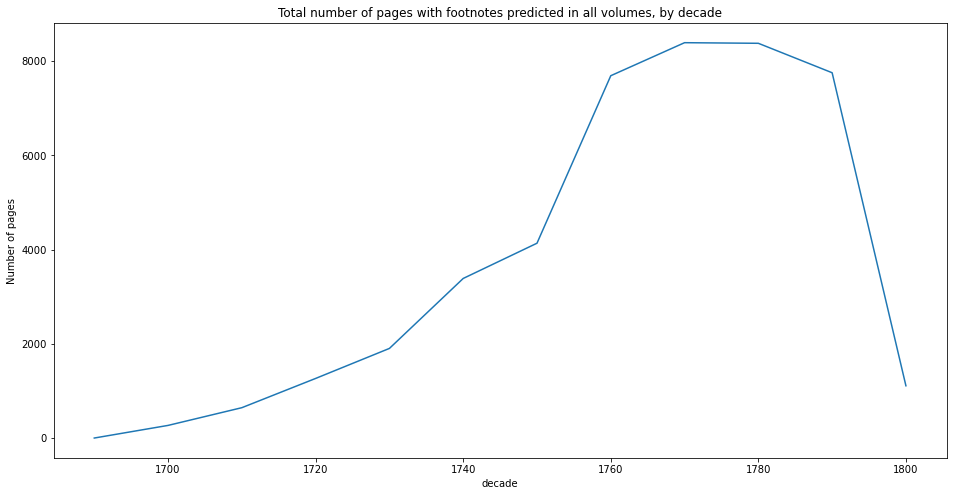

In [253]:
# Plot a time series (by decade, not year), of the total number of footnoted pages in all volumes
footnotes_df.groupby('decade')['fn_pages'].sum().plot(title="Total number of pages with footnotes predicted in all volumes, by decade", figsize=(16,8)).set_ylabel("Number of pages")

Text(0, 0.5, 'Percentage (as decimal)')

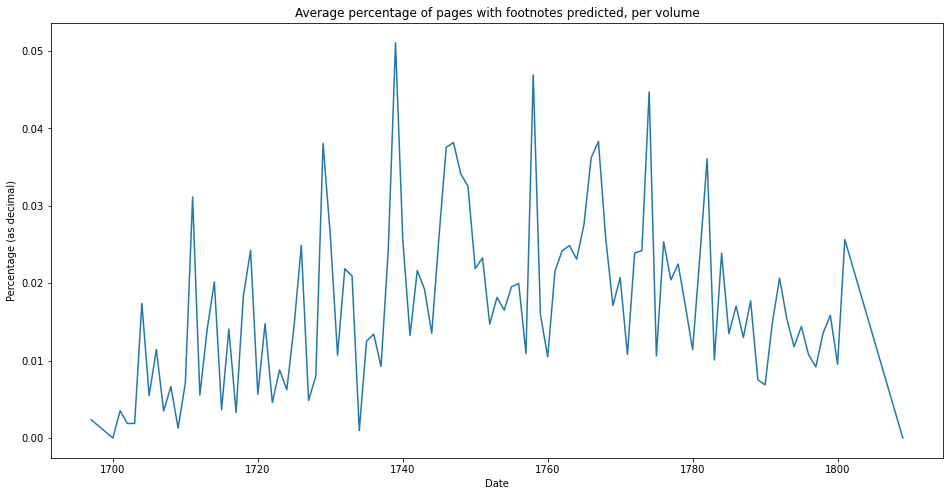

In [254]:
# Plot a time series of the average percentage of footnoted pages, per volume
footnotes_df.groupby('Date')['fn.percent'].mean().plot(title="Average percentage of pages with footnotes predicted, per volume", figsize=(16,8)).set_ylabel("Percentage (as decimal)")

Text(0, 0.5, 'Percentage (as decimal)')

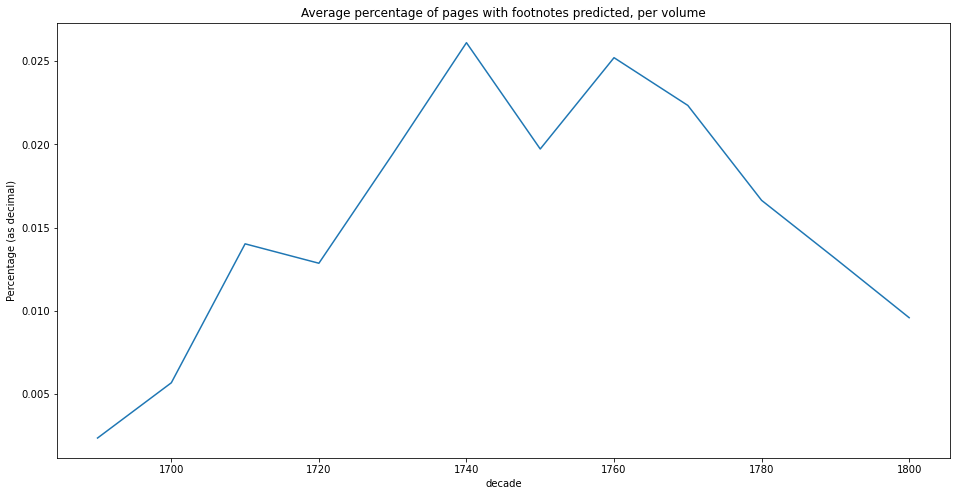

In [255]:
# Plot a time series (by decade) of the average percentage of footnoted pages, per volume
footnotes_df.groupby('decade')['fn.percent'].mean().plot(title="Average percentage of pages with footnotes predicted, per volume", figsize=(16,8)).set_ylabel("Percentage (as decimal)")

Text(0, 0.5, 'Number of volumes')

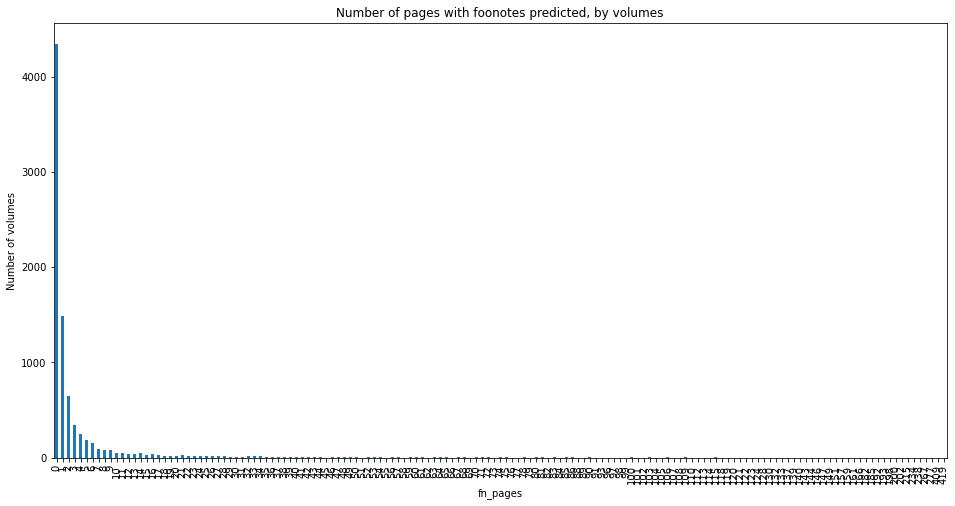

In [256]:
# Plot the number of volumes by respective number of footnoted pages
footnotes_df.groupby('fn_pages')['DocumentID'].count().plot(kind='bar', title="Number of pages with foonotes predicted, by volumes", figsize=(16,8)).set_ylabel("Number of volumes")

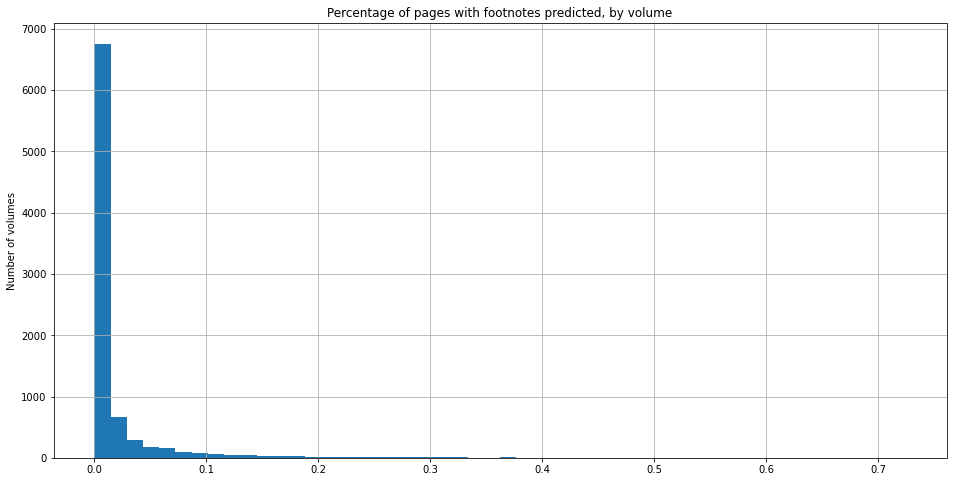

In [257]:
# Plot the number of volumes by percentage of footnoted pages (using a historgram to bin percentages)
fig, ax = plt.subplots(figsize = (6,4))
footnotes_df['fn.percent'].plot(kind = "hist", bins=50, figsize=(16,8), \
                              title="Percentage of pages with footnotes predicted, by volume", \
                             grid=True).set_ylabel("Number of volumes")
plt.show()

Text(0, 0.5, 'Number of volumes')

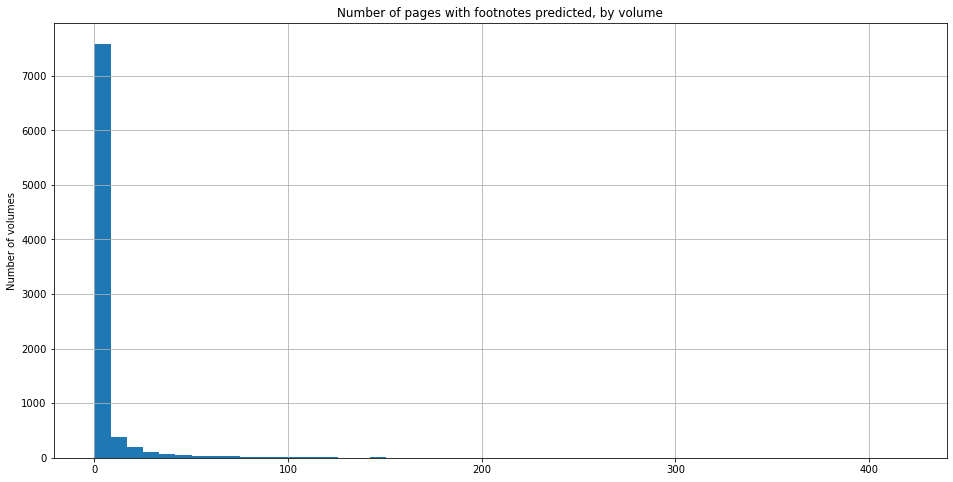

In [258]:
# Plot the number of volumes by number of footnoted pages (using a historgram to bin the number)
footnotes_df['fn_pages'].plot(kind='hist', bins=50, figsize=(16,8), \
                              title="Number of pages with footnotes predicted, by volume", \
                             grid=True).set_ylabel("Number of volumes")


In [259]:
# Write a function to identify only the rows with footnotes present
def just_footnotes(row):
  if row['fn_pages'] > 0:
    return row['fn_pages']
  else:
    return ''

# Use our function to add a new column to our dataframew with just the rows with foonotes
footnotes_df['just_footnotes'] = footnotes_df.apply(just_footnotes, axis=1)

In [260]:
footnotes_df[['just_footnotes']] = footnotes_df[['just_footnotes']].apply(pd.to_numeric)  

In [261]:
footnotes_df['just_footnotes'].dtype

dtype('float64')

Text(0, 0.5, 'Number of volumes')

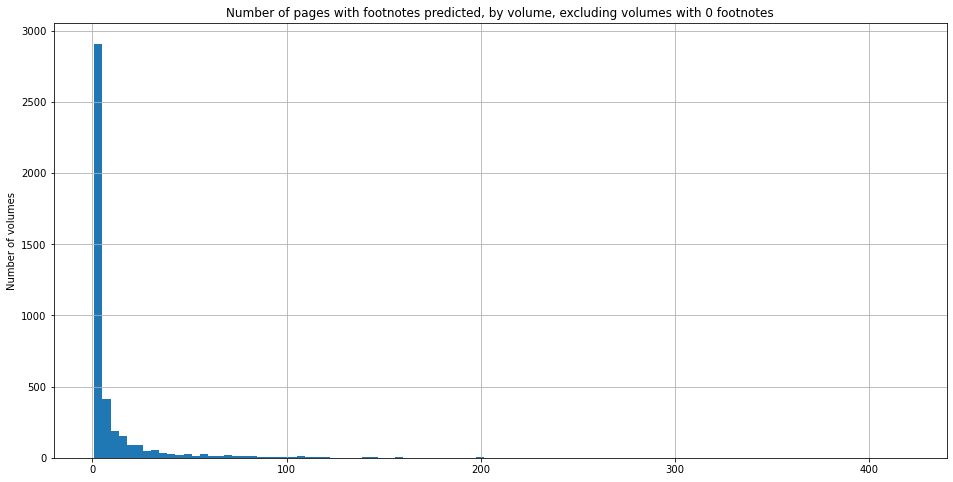

In [262]:
# Using the new column we created
# Plot the distribution of footnoted pages in volumes with footnotes present
footnotes_df['just_footnotes'].plot(kind='hist', bins=100, figsize=(16,8), \
                              title="Number of pages with footnotes predicted, by volume, excluding volumes with 0 footnotes", \
                             grid=True).set_ylabel("Number of volumes")


Text(0.04, 0.5, 'common Y')

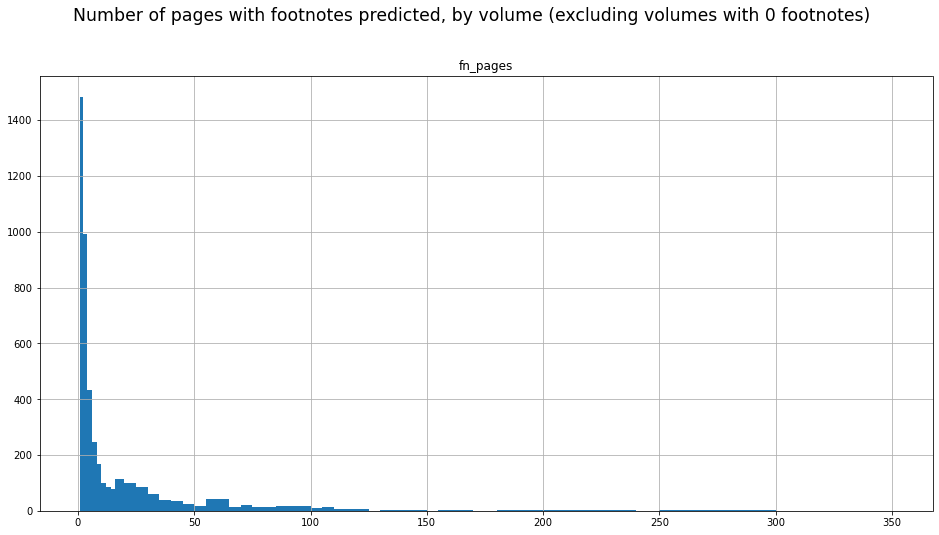

In [263]:
footnotes_df.hist('fn_pages', bins=[1, 2, 4, 6, 8, 10, 12, 14, 16, 20, 25, 30, 35, 40, 45, 50, 55, 65, 70, 75, 80, 85, 100, 105,  110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 170, 180, 190, 200, 220, 240, 250, 300, 350], figsize=(16,8))
plt.suptitle('Number of pages with footnotes predicted, by volume (excluding volumes with 0 footnotes)', x=0.5, y=1.0, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')

## 2. One Footnote Subset

This data subset represents all volumes in ECCOFictionTXTLab.csv that contain one page with footnotes predicted. The individual page images for each of these pages was subsequently human-verified to validate the footnote prediction and count the number of footnotes present.

The subset was created from the ECCO-Footnote-Manifest-volumes-with-one-footnote.csv, using the human-verification data from researcehers. 



### Data Dictionary

`fn_pages`: number of pages with footnotes predicted by the model's four machine learning and classification algorithms
`nofn_pages`: number of pages with no footnotes predicted by the model's four machine learning and classification algorithms 	
`TableName`: Name of metadata table 	
`fn.percent`: percentage of pages with footnotes predicted 	
**`footnotes_present`**: number of footnotes present (human-verified) 

In [264]:
# Create a new dataframe with the annotated footnotes
one_footnote_df = pd.read_csv('Human-Verified-ECCO-Footnote-Manifest-volumes-with-one-footnote.csv', encoding='utf-8', parse_dates=True)

In [265]:
# Let's look at the first 5 rows of our one-foonote subset
one_footnote_df.head(5)

,Unnamed: 0,Filename,DocumentID,ESTC_ID,Date,Title,Vol_Number,Author,Imprint,Field_Headings,fn_pages,nofn_pages,TableName,fn.percent,decade,footnotes_present
0,5098,0000100701.xml,100701,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 1,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",1,259,Manifest_LitAndLang2,0.003846,1770,1
1,5099,0000100702.xml,100702,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 2,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",1,261,Manifest_LitAndLang2,0.003817,1770,0
2,5100,0000100800.xml,100800,T112791,1788,"Ismene and Ismenias, a novel translated from the French by L. H. Le Moine, ...",0,"Eustathius, Macrembolites","London [i.e. Paris] : et se trouve <c3><a0> Paris, chez Cazin, 1788.","Eustathius,, Macrembolites,, 12th cent., De Ismeniae et Ismenes amoribus libri XI, Early works t...",1,211,Manifest_LitAndLang2,0.004717,1780,0
3,450,0000200500.xml,200500,T128705,1791,"Scelta di novelle di Giovanni Boccaccio, fatta dal Dottore Giuseppe Giannini.",0,"Boccaccio, Giovanni","In Londra : presso Francesco Wingrave, successore di Giovanni Nourse, Nella Strada detta Strand,...","Italian fiction, 18th century",1,306,Manifest_LitAndLang1,0.003257,1790,0
4,453,0000200700.xml,200700,T128696,1741,"The decameron, or ten days entertainment of Boccace. Translated from the Italian.",0,"Boccaccio, Giovanni","London : printed for R. Dodsley, at Tully's Head in Pall-Mall, MDCCXLI. [1741].","Wood-engraving, English, Specimens, 17th century",1,600,Manifest_LitAndLang1,0.001664,1740,2


In [266]:
one_footnote_df['footnotes_present'] = one_footnote_df['footnotes_present'].astype(int)

### Visualizing the one footnote subset 

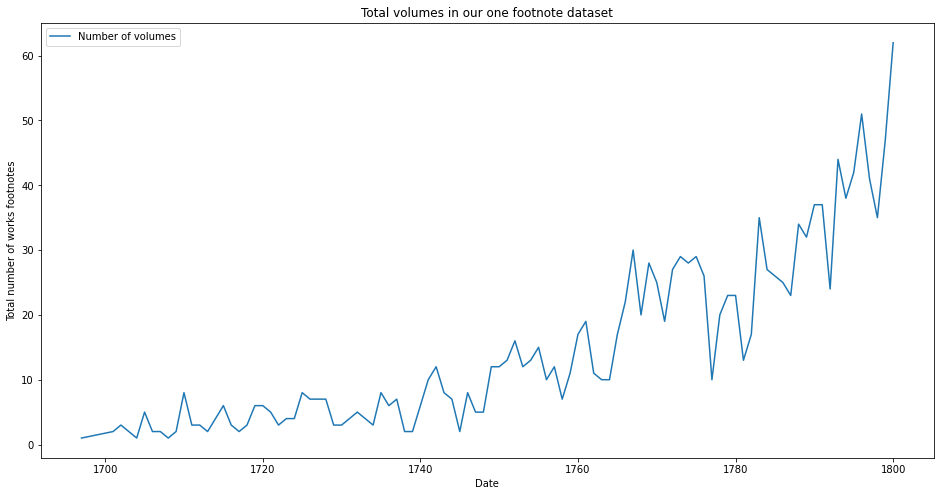

In [267]:
one_footnote_df.groupby('Date')[['footnotes_present']].count().plot(title="Total volumes in our one footnote dataset", figsize=(16,8))\
.set_ylabel("Total number of works footnotes")
plt.legend(["Number of volumes"])

Text(0, 0.5, 'Total number of works footnotes')

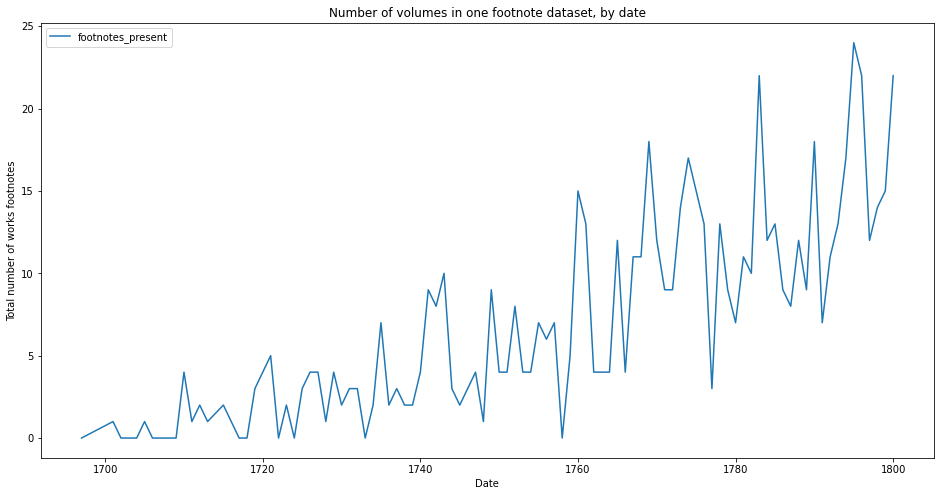

In [268]:
one_footnote_df.groupby('Date')[['footnotes_present']].sum().plot(title="Number of volumes in one footnote dataset, by date", figsize=(16,8))\
.set_ylabel("Total number of works footnotes")

Text(0, 0.5, 'Number of footnotes')

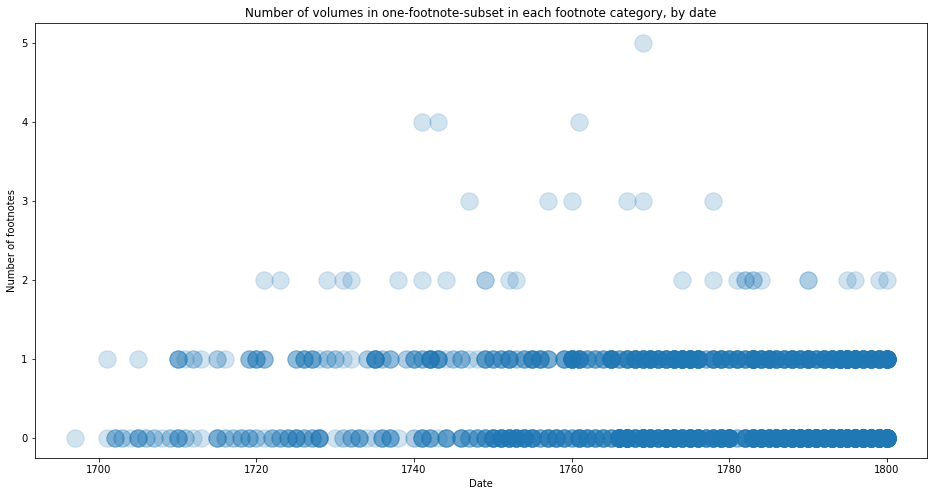

In [269]:
one_footnote_df.plot.scatter(x = 'Date', y = 'footnotes_present',  s=300, alpha=0.2, title="Number of volumes in one-footnote-subset in each footnote category, by date", figsize=(16,8)).set_ylabel("Number of footnotes")

In [270]:
one_footnote_df['fn_pages'].dtype

dtype('int64')

Text(0, 0.5, 'Number of footnotes')

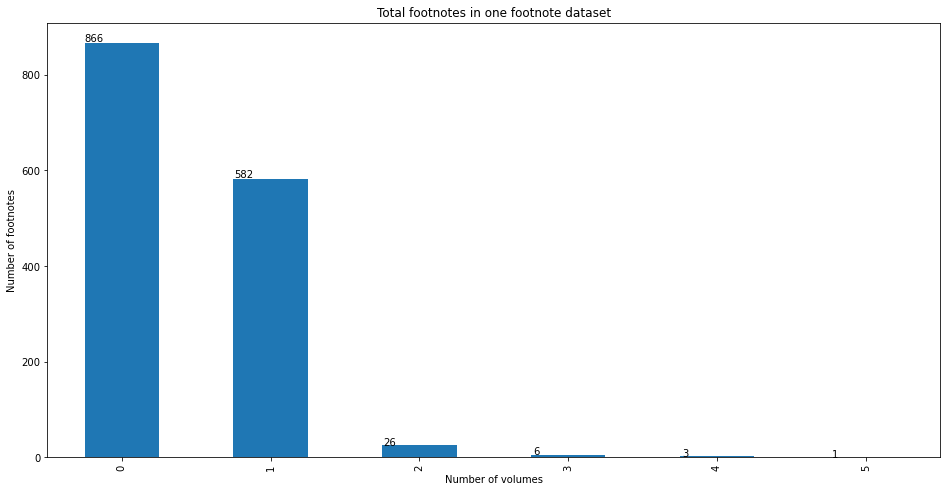

In [271]:
ax = one_footnote_df.groupby('footnotes_present')['DocumentID'].count().plot(kind='bar', title="Total footnotes in one footnote dataset", figsize=(16,8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Number of volumes")
ax.set_ylabel("Number of footnotes")

Text(0, 0.5, 'Categories of foonoted pages (from 0 to 5 footnotes)')

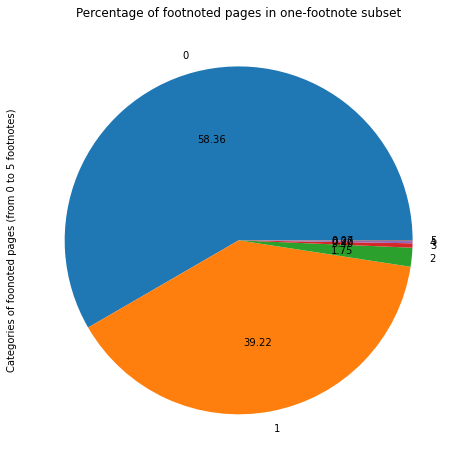

In [272]:
one_footnote_df['footnotes_present'].value_counts().plot(kind='pie',autopct='%.2f', title="Percentage of footnoted pages in one-footnote subset", figsize=(16,8))\
.set_ylabel("Categories of foonoted pages (from 0 to 5 footnotes)")

In [273]:
#Print the number of each footnote type
one_footnote_df['footnotes_present'].value_counts()

0    866
1    582
2     26
3      6
4      3
5      1
Name: footnotes_present, dtype: int64

In [274]:
one_footnote_df['footnotes_present'].count()

1484

### Percentage of each footnote category in our one footnote dataset:

In [275]:
# Print the percentage of each footnote category in our one footnote dataset
one_footnote_df['footnotes_present'].value_counts() / one_footnote_df['footnotes_present'].count() * 100

0    58.355795
1    39.218329
2     1.752022
3     0.404313
4     0.202156
5     0.067385
Name: footnotes_present, dtype: float64

In [276]:
one_footnote_df['Title'].value_counts()

The life and opinions of Tristram Shandy, gentleman. |...                                                                                                                                                                                                                                                                             11
The adventures of Roderick Random. In two volumes. ...                                                                                                                                                                                                                                                                                 8
A sentimental journey through France and Italy. By Mr. Yorick. ...                                                                                                                                                                                                                                                                     8
The rambler. 

In [277]:
one_footnote_df.describe()

,Unnamed: 0,DocumentID,Date,fn_pages,nofn_pages,fn.percent,decade,footnotes_present
count,1484.000000,1.484000e+03,1484.000000,1484.0,1484.000000,1484.000000,1484.000000,1484.000000
mean,4058.925876,5.871330e+08,1772.935984,1.0,239.410377,0.007124,1768.463612,0.450809
std,2501.738625,4.469581e+08,23.377850,0.0,106.881887,0.012219,23.369226,0.587237
min,3.000000,1.007010e+05,1697.000000,1.0,6.000000,0.001287,1690.000000,0.000000
25%,1840.750000,3.280028e+07,1761.000000,1.0,177.000000,0.003300,1760.000000,0.000000
50%,3931.000000,6.603501e+08,1778.000000,1.0,241.000000,0.004132,1770.000000,0.000000
75%,6069.500000,9.898002e+08,1792.000000,1.0,302.000000,0.005618,1790.000000,1.000000
max,8606.000000,1.294101e+09,1800.000000,1.0,776.000000,0.142857,1800.000000,5.000000


In [278]:
# Slice to include only volumes with more than 1 footnote per page
many_footnotes_one_page = one_footnote_df[one_footnote_df['footnotes_present'] > 1]

Text(0, 0.5, 'Categories of foonoted pages (from 2 to 5 footnotes)')

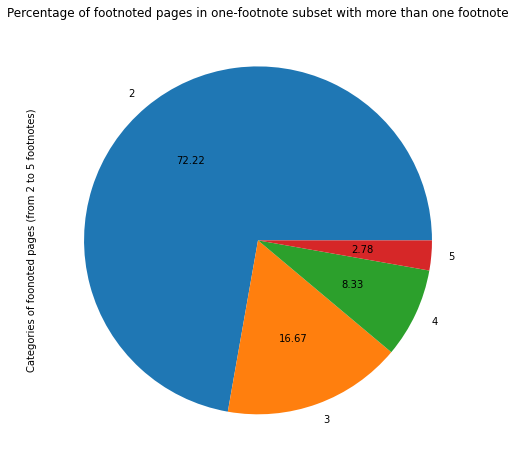

In [279]:
many_footnotes_one_page['footnotes_present'].value_counts().plot(kind='pie',autopct='%.2f', title="Percentage of footnoted pages in one-footnote subset with more than one footnote", figsize=(16,8))\
.set_ylabel("Categories of foonoted pages (from 2 to 5 footnotes)")

Text(0, 0.5, 'Number of volumes')

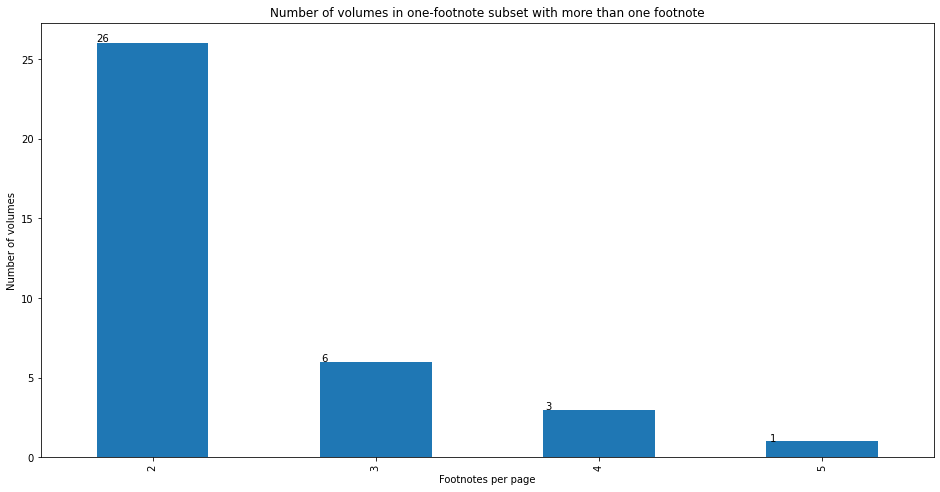

In [280]:
ax = many_footnotes_one_page['footnotes_present'].value_counts().plot(kind='bar', title="Number of volumes in one-footnote subset with more than one footnote", figsize=(16,8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Footnotes per page")
ax.set_ylabel("Number of volumes")

In [281]:
print(one_footnote_df['Title'])

0                        Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...
1                        Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...
2                            Ismene and Ismenias, a novel translated from the French by L. H. Le Moine, ...
3                             Scelta di novelle di Giovanni Boccaccio, fatta dal Dottore Giuseppe Giannini.
4                         The decameron, or ten days entertainment of Boccace. Translated from the Italian.
                                                       ...                                                 
1479                                               The tatler. By the Right Honourable Joseph Addison, Esq;
1480    Olivia; or, deserted bride. By the author of Hortensia, The Rambles of Frankly, and The Fashiona...
1481    The fables of Ph<c3><a6>drus in Latin and English: the translation as literal as the idioms of t...
1482       The observer: bei

### Pages misclassified by the model as having footnotes

In [282]:
miscategorized_pages = one_footnote_df[one_footnote_df['footnotes_present'] == 0]

In [283]:
miscategorized_pages.to_csv('miscategorized_pages_in_one_footnote_dataset.csv', encoding='utf-8', index=False)

In [284]:
miscategorized_pages['Title'].value_counts()[:50]

The adventures of Peregrine Pickle. In which are included, Memoirs of a lady of quality. In four volumes. ...                                                                                                7
The rambler. In four volumes. ...                                                                                                                                                                            7
Cassandra, a romance. In five parts. Written originally in French, and faithfully translated into English, by Sir Charles Cotterell, Master of the Ceremonies to King Charles I. and King Charles II. ...    5
The spectator. ...                                                                                                                                                                                           5
The fool of quality; or, the history of Henry Earl of Moreland. In four volumes. ... By Mr. Brooke.                                                                         

In [285]:
miscategorized_pages['Author'].value_counts()[:20]

Anon                                                        162
Smollett, Tobias George                                      29
Defoe, Daniel                                                28
Johnson, Samuel                                              22
Burney, Fanny                                                18
Haywood, Eliza Fowler                                        13
F<c3><a9>nelon, Fran<c3><a7>ois de Salignac de La Mothe-     11
Richardson, Samuel                                           10
Lady                                                         10
Sterne, Laurence                                             10
Reeve, Clara                                                  9
Brooke, Henry                                                 8
Steele, Richard, Sir                                          8
Bennett, Mrs. (Agnes Maria)                                   8
Fielding, Sarah                                               8
Swift, Jonathan                         

In [286]:
miscategorized_pages_in_one_fn_set = pd.read_csv('miscategorized_pages_in_one_footnote_dataset.csv', encoding='utf-8')

In [550]:
one_footnote_miscategorized_date_dist = miscategorized_pages_in_one_fn_set['Date'].value_counts()


In [549]:
one_footnote_date_dist = one_footnote_df['Date'].value_counts()

## Evaluation of  model performance by decade and date 

In [538]:
# Calcuate the proportion of footnotes in the onefootnotes
proportion_of_miscategorized_footnotes_by_date = one_footnote_miscategorized_date_dist / one_footnote_date_dist
proportion_of_miscategorized_footnotes_by_date = proportion_of_miscategorized_footnotes_by_date.reset_index()
proportion_of_miscategorized_footnotes_by_date.rename(columns = {'index':'Date', 'Date':'Proportion miscategroized'}, inplace=True)
proportion_of_miscategorized_footnotes_by_date

,Date,Proportion miscategroized
0,1697,1.000000
1,1701,0.500000
2,1702,1.000000
3,1703,1.000000
4,1704,1.000000
5,1705,0.800000
6,1706,1.000000
7,1707,1.000000
8,1708,1.000000
9,1709,1.000000


### Does the model perform better for later dates in the dataset?

In [539]:
## Test if there's a correlation between the number of miscategorized footnotes and the date
## If the number is close to 1 (between 1 and 0.8), we would expect to see a strong positive correlation, ie 
# the later decades are more often misclassified. If the nubmer is between 0.6 - 0.8, moderate correation
# If the number  is between -1 and -0.8, that would mean a strong negative correlation.
proportion_of_miscategorized_footnotes_by_date.corr()

,Date,Proportion miscategroized
Date,1.000000,-0.265123
Proportion miscategroized,-0.265123,1.000000


If the model performed better, we would expect there to be a strong negative correlation (ie, as the date goes up, the proporition of miscategorized footnotes goes down0> In the case above, a Pearson's value of -0.265 is under -0.6, which tells us there's no correlation between the date and the

In [542]:
one_footnote_miscategorized_decade_dist = miscategorized_pages_in_one_fn_set['decade'].value_counts()
one_footnote_miscategorized_decade_dist

1790    248
1780    148
1770    126
1760    101
1750     76
1800     41
1740     34
1720     30
1710     22
1730     21
1700     18
1690      1
Name: decade, dtype: int64

In [545]:
one_footnote_decade_dist = one_footnote_df['decade'].value_counts()
one_footnote_decade_dist

1790    396
1780    255
1770    236
1760    184
1750    121
1740     75
1800     62
1720     54
1730     44
1710     36
1700     20
1690      1
Name: decade, dtype: int64

In [546]:
# Calcuate the proportion of footnotes in the onefootnotes
proportion_of_miscategorized_footnotes_by_decade = one_footnote_miscategorized_decade_dist / one_footnote_decade_dist
proportion_of_miscategorized_footnotes_by_decade = proportion_of_miscategorized_footnotes_by_decade.reset_index()
proportion_of_miscategorized_footnotes_by_decade.rename(columns = {'index':'decade', 'decade':'Proportion miscategroized'}, inplace=True)
proportion_of_miscategorized_footnotes_by_decade

,decade,Proportion miscategroized
0,1690,1.000000
1,1700,0.900000
2,1710,0.611111
3,1720,0.555556
4,1730,0.477273
5,1740,0.453333
6,1750,0.628099
7,1760,0.548913
8,1770,0.533898
9,1780,0.580392


### Does the model perform better for later decades in the dataset?

In [547]:
proportion_of_miscategorized_footnotes_by_decade.corr()

,decade,Proportion miscategroized
decade,1.00000,-0.47584
Proportion miscategroized,-0.47584,1.00000


## 3. One Footnote Subset, with tags

This data subset represents all volumes in ECCOFictionTXTLab.csv that contain one page with footnotes predicted. The individual page images for each of these pages was subsequently human-verified to validate the footnote prediction and count the number of footnotes present.

This subset is created from the ECCO-Footnote-Manifest-volumes-with-one-footnote.csv, using the data from two sets of researcher data, both updated as of April 9, 2021. We have concatenated the two sets here.

### Data Dictionary

`fn_pages`: number of pages with footnotes predicted by the model's four machine learning and classification algorithms
`nofn_pages`: number of pages with no footnotes predicted by the model's four machine learning and classification algorithms 	
`TableName`: Name of metadata table 	
`fn.percent`: percentage of pages with footnotes predicted 	
**`footnotes_present`**: number of footnotes present (human-verified) 
`tags`: controlled vocabular of tags describing the type of footnote or non-footnote typoraphic features


In [288]:
# Create a new dataframe with the annotated footnotes
one_footnote_tagged_df = pd.read_csv('Human-Verified-ECCO-Footnote-Manifest-volumes-with-one-footnote-with-tags.csv', encoding='utf-8', parse_dates=True)

In [289]:
one_footnote_tagged_df.head()

,Unnamed: 0,Filename,DocumentID,ESTC_ID,Date,Title,Vol_Number,Author,Imprint,Field_Headings,fn_pages,nofn_pages,TableName,fn.percent,decade,footnotes_present,tags,Unnamed: 17,Unnamed: 18
0,5098,0000100701.xml,100701,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 1,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",1,259,Manifest_LitAndLang2,0.003846,1770,1,"C, IT",NaN,NaN
1,5099,0000100702.xml,100702,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 2,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",1,261,Manifest_LitAndLang2,0.003817,1770,0,CW,NaN,NaN
2,5100,0000100800.xml,100800,T112791,1788,"Ismene and Ismenias, a novel translated from the French by L. H. Le Moine, ...",0,"Eustathius, Macrembolites","London [i.e. Paris] : et se trouve <c3><a0> Paris, chez Cazin, 1788.","Eustathius,, Macrembolites,, 12th cent., De Ismeniae et Ismenes amoribus libri XI, Early works t...",1,211,Manifest_LitAndLang2,0.004717,1780,0,"BQ, P, TY, TE",NaN,NaN
3,450,0000200500.xml,200500,T128705,1791,"Scelta di novelle di Giovanni Boccaccio, fatta dal Dottore Giuseppe Giannini.",0,"Boccaccio, Giovanni","In Londra : presso Francesco Wingrave, successore di Giovanni Nourse, Nella Strada detta Strand,...","Italian fiction, 18th century",1,306,Manifest_LitAndLang1,0.003257,1790,0,SE,NaN,NaN
4,453,0000200700.xml,200700,T128696,1741,"The decameron, or ten days entertainment of Boccace. Translated from the Italian.",0,"Boccaccio, Giovanni","London : printed for R. Dodsley, at Tully's Head in Pall-Mall, MDCCXLI. [1741].","Wood-engraving, English, Specimens, 17th century",1,600,Manifest_LitAndLang1,0.001664,1740,2,NaN,NaN,NaN


----

### Model metrics: tagged one-footnote subset

**Terminology**  
TP (True Positives): known  
TN (True Negatives): unknown  
FP (False Posiives): known  
FN (False Negatives): unknown 


Because we don't have the TIFF files for pages that the machine learning and classification algorithms predicted to contain no footnotes, we can't compute false negative and true metrics. This also means  so we can't comput the full classification accuracy, recall, or specificity 
>(**Classification accuracy**: percentage of correct predictions in the one footnote subset, or overall, how often is the classifier correct? `classification_accuracy = (TP + TN) / float(TP + TN + FP + FN))`)

>**Recall** (or "sensitivity"): When the actual value is positive, how often is the prediction correct? `recall = TP / float(FN + TP)`

But what we do have is the number of false positives for the subset.

### Precision
**Precision**:  When a positive value is predicted, how often is the prediction correct?
`precision = TP / float(TP + FP)`

In [290]:
#Calculate the number of true positives
TP = one_footnote_tagged_df[one_footnote_tagged_df['footnotes_present'] != 0]['DocumentID'].count()
print("True Positives:", TP)

True Positives: 624


In [291]:
#Calculate the number of false positives
FP = one_footnote_tagged_df[one_footnote_tagged_df['footnotes_present'] == 0]['DocumentID'].count()
print("False Positives:", FP)

False Positives: 860


Let's calculate the **precision score**

In [292]:
#Calculate the precision score
precision = TP / float(TP + FP)
print("Precision score:", precision)
print("Precision score:", precision * 100, "%")

Precision score: 0.42048517520215634
Precision score: 42.04851752021563 %


-----

### Data parsing: Cleaning and parsing our multi-value tags

In [293]:
# splitting multivalue cells into rows by delimiter ','
tags_list = one_footnote_tagged_df.tags.str.split(',')
one_footnote_tagged_df.tags = tags_list

In [294]:
one_footnote_tagged_mr_df = one_footnote_tagged_df.explode('tags')

In [295]:
one_footnote_tagged_mr_df.head(10)

,Unnamed: 0,Filename,DocumentID,ESTC_ID,Date,Title,Vol_Number,Author,Imprint,Field_Headings,fn_pages,nofn_pages,TableName,fn.percent,decade,footnotes_present,tags,Unnamed: 17,Unnamed: 18
0,5098,0000100701.xml,100701,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 1,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",1,259,Manifest_LitAndLang2,0.003846,1770,1,C,NaN,NaN
0,5098,0000100701.xml,100701,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 1,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",1,259,Manifest_LitAndLang2,0.003846,1770,1,IT,NaN,NaN
1,5099,0000100702.xml,100702,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 2,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",1,261,Manifest_LitAndLang2,0.003817,1770,0,CW,NaN,NaN
2,5100,0000100800.xml,100800,T112791,1788,"Ismene and Ismenias, a novel translated from the French by L. H. Le Moine, ...",0,"Eustathius, Macrembolites","London [i.e. Paris] : et se trouve <c3><a0> Paris, chez Cazin, 1788.","Eustathius,, Macrembolites,, 12th cent., De Ismeniae et Ismenes amoribus libri XI, Early works t...",1,211,Manifest_LitAndLang2,0.004717,1780,0,BQ,NaN,NaN
2,5100,0000100800.xml,100800,T112791,1788,"Ismene and Ismenias, a novel translated from the French by L. H. Le Moine, ...",0,"Eustathius, Macrembolites","London [i.e. Paris] : et se trouve <c3><a0> Paris, chez Cazin, 1788.","Eustathius,, Macrembolites,, 12th cent., De Ismeniae et Ismenes amoribus libri XI, Early works t...",1,211,Manifest_LitAndLang2,0.004717,1780,0,P,NaN,NaN
2,5100,0000100800.xml,100800,T112791,1788,"Ismene and Ismenias, a novel translated from the French by L. H. Le Moine, ...",0,"Eustathius, Macrembolites","London [i.e. Paris] : et se trouve <c3><a0> Paris, chez Cazin, 1788.","Eustathius,, Macrembolites,, 12th cent., De Ismeniae et Ismenes amoribus libri XI, Early works t...",1,211,Manifest_LitAndLang2,0.004717,1780,0,TY,NaN,NaN
2,5100,0000100800.xml,100800,T112791,1788,"Ismene and Ismenias, a novel translated from the French by L. H. Le Moine, ...",0,"Eustathius, Macrembolites","London [i.e. Paris] : et se trouve <c3><a0> Paris, chez Cazin, 1788.","Eustathius,, Macrembolites,, 12th cent., De Ismeniae et Ismenes amoribus libri XI, Early works t...",1,211,Manifest_LitAndLang2,0.004717,1780,0,TE,NaN,NaN
3,450,0000200500.xml,200500,T128705,1791,"Scelta di novelle di Giovanni Boccaccio, fatta dal Dottore Giuseppe Giannini.",0,"Boccaccio, Giovanni","In Londra : presso Francesco Wingrave, successore di Giovanni Nourse, Nella Strada detta Strand,...","Italian fiction, 18th century",1,306,Manifest_LitAndLang1,0.003257,1790,0,SE,NaN,NaN
4,453,0000200700.xml,200700,T128696,1741,"The decameron, or ten days entertainment of Boccace. Translated from the Italian.",0,"Boccaccio, Giovanni","London : printed for R. Dodsley, at Tully's Head in Pall-Mall, MDCCXLI. [1741].","Wood-engraving, English, Specimens, 17th century",1,600,Manifest_LitAndLang1,0.001664,1740,2,NaN,NaN,NaN
5,458,0000300202.xml,300202,T102664,1789,"Zelia in the desert. From the French. By the lady who translated \adelaide and Theodore\""; and \...",Volume 2,"Daubenton, Mme. (Marguerite)","London : printed for G. and T. Wilkie, No 71, St. Paul's Church-Yard, MDCCLXXXIX. [1789].","Voyages, Imaginary, Early works to 1800",1,257,Manifest_LitAndLang1,0.003876,1780,0,CW,NaN,NaN


In [296]:
one_footnote_tagged_mr_df['tags'].dtype

dtype('O')

In [297]:
# splitting multi-valued cells by delimiter '/'
tags_list = one_footnote_tagged_mr_df.tags.str.split('/')
one_footnote_tagged_mr_df.tags = tags_list

In [298]:
one_footnote_tagged_MR_df = one_footnote_tagged_mr_df.explode('tags')

In [299]:
one_footnote_tagged_MR_df

,Unnamed: 0,Filename,DocumentID,ESTC_ID,Date,Title,Vol_Number,Author,Imprint,Field_Headings,fn_pages,nofn_pages,TableName,fn.percent,decade,footnotes_present,tags,Unnamed: 17,Unnamed: 18
0,5098,0000100701.xml,100701,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 1,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",1,259,Manifest_LitAndLang2,0.003846,1770,1,C,NaN,NaN
0,5098,0000100701.xml,100701,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 1,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",1,259,Manifest_LitAndLang2,0.003846,1770,1,IT,NaN,NaN
1,5099,0000100702.xml,100702,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 2,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",1,261,Manifest_LitAndLang2,0.003817,1770,0,CW,NaN,NaN
2,5100,0000100800.xml,100800,T112791,1788,"Ismene and Ismenias, a novel translated from the French by L. H. Le Moine, ...",0,"Eustathius, Macrembolites","London [i.e. Paris] : et se trouve <c3><a0> Paris, chez Cazin, 1788.","Eustathius,, Macrembolites,, 12th cent., De Ismeniae et Ismenes amoribus libri XI, Early works t...",1,211,Manifest_LitAndLang2,0.004717,1780,0,BQ,NaN,NaN
2,5100,0000100800.xml,100800,T112791,1788,"Ismene and Ismenias, a novel translated from the French by L. H. Le Moine, ...",0,"Eustathius, Macrembolites","London [i.e. Paris] : et se trouve <c3><a0> Paris, chez Cazin, 1788.","Eustathius,, Macrembolites,, 12th cent., De Ismeniae et Ismenes amoribus libri XI, Early works t...",1,211,Manifest_LitAndLang2,0.004717,1780,0,P,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,8387,1294000101.xml,1294000101,N061349,1787,"The observer: being a collection of moral, literary and familiar essays. The second edition. ...",Volume 1,"Cumberland, Richard","London : printed for C. Dilly in the Poultry, M.DCC.LXXXVII. [1787].","Conduct of life, Early works to 1900, Greek literature, History and criticism",1,303,Manifest_LitAndLang2,0.003289,1780,0,LB,NaN,NaN
1483,8396,1294100502.xml,1294100502,N017918,1752,"The guardian. In two volumes. To which is added, a translation of the mottos and quotations: tog...",Volume 2,Anon,"Dublin : printed for Peter Wilson, in Dame-Street, M,DCC,LII. [1752].","Great Britain, Politics and government, 1702-1714, Periodicals",1,412,Manifest_LitAndLang2,0.002421,1750,0,LB,NaN,NaN
1483,8396,1294100502.xml,1294100502,N017918,1752,"The guardian. In two volumes. To which is added, a translation of the mottos and quotations: tog...",Volume 2,Anon,"Dublin : printed for Peter Wilson, in Dame-Street, M,DCC,LII. [1752].","Great Britain, Politics and government, 1702-1714, Periodicals",1,412,Manifest_LitAndLang2,0.002421,1750,0,P,NaN,NaN
1483,8396,1294100502.xml,1294100502,N017918,1752,"The guardian. In two volumes. To which is added, a translation of the mottos and quotations: tog...",Volume 2,Anon,"Dublin : printed for Peter Wilson, in Dame-Street, M,DCC,LII. [1752].","Great Britain, Politics and government, 1702-1714, Periodicals",1,412,Manifest_LitAndLang2,0.002421,1750,0,TY,NaN,NaN


In [300]:
# Removing whitespaces
one_footnote_tagged_MR_df.tags = one_footnote_tagged_MR_df.tags.str.replace(' ', '')
one_footnote_tagged_MR_df['tags'].value_counts()

CW       600
TY       411
C        235
FN       226
SM       203
P        175
PB       167
BQ       161
IT       122
LB       118
T         93
O         90
TE        87
IN        82
SE        65
MT        50
LS        44
PO        41
RQ        22
D         12
M         10
PE         4
SD         3
I          2
TE.LS      1
CH         1
CW.TY      1
LP         1
BP         1
NY         1
TY.CW      1
RQ.CW      1
P.LB       1
LD         1
Name: tags, dtype: int64

In [301]:
one_footnote_tagged_MR_df

,Unnamed: 0,Filename,DocumentID,ESTC_ID,Date,Title,Vol_Number,Author,Imprint,Field_Headings,fn_pages,nofn_pages,TableName,fn.percent,decade,footnotes_present,tags,Unnamed: 17,Unnamed: 18
0,5098,0000100701.xml,100701,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 1,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",1,259,Manifest_LitAndLang2,0.003846,1770,1,C,NaN,NaN
0,5098,0000100701.xml,100701,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 1,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",1,259,Manifest_LitAndLang2,0.003846,1770,1,IT,NaN,NaN
1,5099,0000100702.xml,100702,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 2,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",1,261,Manifest_LitAndLang2,0.003817,1770,0,CW,NaN,NaN
2,5100,0000100800.xml,100800,T112791,1788,"Ismene and Ismenias, a novel translated from the French by L. H. Le Moine, ...",0,"Eustathius, Macrembolites","London [i.e. Paris] : et se trouve <c3><a0> Paris, chez Cazin, 1788.","Eustathius,, Macrembolites,, 12th cent., De Ismeniae et Ismenes amoribus libri XI, Early works t...",1,211,Manifest_LitAndLang2,0.004717,1780,0,BQ,NaN,NaN
2,5100,0000100800.xml,100800,T112791,1788,"Ismene and Ismenias, a novel translated from the French by L. H. Le Moine, ...",0,"Eustathius, Macrembolites","London [i.e. Paris] : et se trouve <c3><a0> Paris, chez Cazin, 1788.","Eustathius,, Macrembolites,, 12th cent., De Ismeniae et Ismenes amoribus libri XI, Early works t...",1,211,Manifest_LitAndLang2,0.004717,1780,0,P,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,8387,1294000101.xml,1294000101,N061349,1787,"The observer: being a collection of moral, literary and familiar essays. The second edition. ...",Volume 1,"Cumberland, Richard","London : printed for C. Dilly in the Poultry, M.DCC.LXXXVII. [1787].","Conduct of life, Early works to 1900, Greek literature, History and criticism",1,303,Manifest_LitAndLang2,0.003289,1780,0,LB,NaN,NaN
1483,8396,1294100502.xml,1294100502,N017918,1752,"The guardian. In two volumes. To which is added, a translation of the mottos and quotations: tog...",Volume 2,Anon,"Dublin : printed for Peter Wilson, in Dame-Street, M,DCC,LII. [1752].","Great Britain, Politics and government, 1702-1714, Periodicals",1,412,Manifest_LitAndLang2,0.002421,1750,0,LB,NaN,NaN
1483,8396,1294100502.xml,1294100502,N017918,1752,"The guardian. In two volumes. To which is added, a translation of the mottos and quotations: tog...",Volume 2,Anon,"Dublin : printed for Peter Wilson, in Dame-Street, M,DCC,LII. [1752].","Great Britain, Politics and government, 1702-1714, Periodicals",1,412,Manifest_LitAndLang2,0.002421,1750,0,P,NaN,NaN
1483,8396,1294100502.xml,1294100502,N017918,1752,"The guardian. In two volumes. To which is added, a translation of the mottos and quotations: tog...",Volume 2,Anon,"Dublin : printed for Peter Wilson, in Dame-Street, M,DCC,LII. [1752].","Great Britain, Politics and government, 1702-1714, Periodicals",1,412,Manifest_LitAndLang2,0.002421,1750,0,TY,NaN,NaN


In [302]:
# Adding a new column called "tag" concatenating the results from "tags" and
# "Unanamed: 17" the secondary tag column. We'll split these up later
one_footnote_tagged_MR_df['tag'] = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df.columns[16:]].apply(
    lambda x: '/'.join(x.dropna().astype(str)),
    axis=1
)
one_footnote_tagged_MR_df

,Unnamed: 0,Filename,DocumentID,ESTC_ID,Date,Title,Vol_Number,Author,Imprint,Field_Headings,fn_pages,nofn_pages,TableName,fn.percent,decade,footnotes_present,tags,Unnamed: 17,Unnamed: 18,tag
0,5098,0000100701.xml,100701,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 1,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",1,259,Manifest_LitAndLang2,0.003846,1770,1,C,NaN,NaN,C
0,5098,0000100701.xml,100701,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 1,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",1,259,Manifest_LitAndLang2,0.003846,1770,1,IT,NaN,NaN,IT
1,5099,0000100702.xml,100702,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 2,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",1,261,Manifest_LitAndLang2,0.003817,1770,0,CW,NaN,NaN,CW
2,5100,0000100800.xml,100800,T112791,1788,"Ismene and Ismenias, a novel translated from the French by L. H. Le Moine, ...",0,"Eustathius, Macrembolites","London [i.e. Paris] : et se trouve <c3><a0> Paris, chez Cazin, 1788.","Eustathius,, Macrembolites,, 12th cent., De Ismeniae et Ismenes amoribus libri XI, Early works t...",1,211,Manifest_LitAndLang2,0.004717,1780,0,BQ,NaN,NaN,BQ
2,5100,0000100800.xml,100800,T112791,1788,"Ismene and Ismenias, a novel translated from the French by L. H. Le Moine, ...",0,"Eustathius, Macrembolites","London [i.e. Paris] : et se trouve <c3><a0> Paris, chez Cazin, 1788.","Eustathius,, Macrembolites,, 12th cent., De Ismeniae et Ismenes amoribus libri XI, Early works t...",1,211,Manifest_LitAndLang2,0.004717,1780,0,P,NaN,NaN,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,8387,1294000101.xml,1294000101,N061349,1787,"The observer: being a collection of moral, literary and familiar essays. The second edition. ...",Volume 1,"Cumberland, Richard","London : printed for C. Dilly in the Poultry, M.DCC.LXXXVII. [1787].","Conduct of life, Early works to 1900, Greek literature, History and criticism",1,303,Manifest_LitAndLang2,0.003289,1780,0,LB,NaN,NaN,LB
1483,8396,1294100502.xml,1294100502,N017918,1752,"The guardian. In two volumes. To which is added, a translation of the mottos and quotations: tog...",Volume 2,Anon,"Dublin : printed for Peter Wilson, in Dame-Street, M,DCC,LII. [1752].","Great Britain, Politics and government, 1702-1714, Periodicals",1,412,Manifest_LitAndLang2,0.002421,1750,0,LB,NaN,NaN,LB
1483,8396,1294100502.xml,1294100502,N017918,1752,"The guardian. In two volumes. To which is added, a translation of the mottos and quotations: tog...",Volume 2,Anon,"Dublin : printed for Peter Wilson, in Dame-Street, M,DCC,LII. [1752].","Great Britain, Politics and government, 1702-1714, Periodicals",1,412,Manifest_LitAndLang2,0.002421,1750,0,P,NaN,NaN,P
1483,8396,1294100502.xml,1294100502,N017918,1752,"The guardian. In two volumes. To which is added, a translation of the mottos and quotations: tog...",Volume 2,Anon,"Dublin : printed for Peter Wilson, in Dame-Street, M,DCC,LII. [1752].","Great Britain, Politics and government, 1702-1714, Periodicals",1,412,Manifest_LitAndLang2,0.002421,1750,0,TY,NaN,NaN,TY


In [303]:
# Now, splitting multi-valued cells in "tag" by /
tag_list = one_footnote_tagged_MR_df.tag.str.split('/')
one_footnote_tagged_MR_df.tag = tag_list

In [304]:
one_footnote_tagged_MR_df = one_footnote_tagged_MR_df.explode('tag')

In [305]:
one_footnote_tagged_MR_df

,Unnamed: 0,Filename,DocumentID,ESTC_ID,Date,Title,Vol_Number,Author,Imprint,Field_Headings,fn_pages,nofn_pages,TableName,fn.percent,decade,footnotes_present,tags,Unnamed: 17,Unnamed: 18,tag
0,5098,0000100701.xml,100701,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 1,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",1,259,Manifest_LitAndLang2,0.003846,1770,1,C,NaN,NaN,C
0,5098,0000100701.xml,100701,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 1,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",1,259,Manifest_LitAndLang2,0.003846,1770,1,IT,NaN,NaN,IT
1,5099,0000100702.xml,100702,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 2,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",1,261,Manifest_LitAndLang2,0.003817,1770,0,CW,NaN,NaN,CW
2,5100,0000100800.xml,100800,T112791,1788,"Ismene and Ismenias, a novel translated from the French by L. H. Le Moine, ...",0,"Eustathius, Macrembolites","London [i.e. Paris] : et se trouve <c3><a0> Paris, chez Cazin, 1788.","Eustathius,, Macrembolites,, 12th cent., De Ismeniae et Ismenes amoribus libri XI, Early works t...",1,211,Manifest_LitAndLang2,0.004717,1780,0,BQ,NaN,NaN,BQ
2,5100,0000100800.xml,100800,T112791,1788,"Ismene and Ismenias, a novel translated from the French by L. H. Le Moine, ...",0,"Eustathius, Macrembolites","London [i.e. Paris] : et se trouve <c3><a0> Paris, chez Cazin, 1788.","Eustathius,, Macrembolites,, 12th cent., De Ismeniae et Ismenes amoribus libri XI, Early works t...",1,211,Manifest_LitAndLang2,0.004717,1780,0,P,NaN,NaN,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,8387,1294000101.xml,1294000101,N061349,1787,"The observer: being a collection of moral, literary and familiar essays. The second edition. ...",Volume 1,"Cumberland, Richard","London : printed for C. Dilly in the Poultry, M.DCC.LXXXVII. [1787].","Conduct of life, Early works to 1900, Greek literature, History and criticism",1,303,Manifest_LitAndLang2,0.003289,1780,0,LB,NaN,NaN,LB
1483,8396,1294100502.xml,1294100502,N017918,1752,"The guardian. In two volumes. To which is added, a translation of the mottos and quotations: tog...",Volume 2,Anon,"Dublin : printed for Peter Wilson, in Dame-Street, M,DCC,LII. [1752].","Great Britain, Politics and government, 1702-1714, Periodicals",1,412,Manifest_LitAndLang2,0.002421,1750,0,LB,NaN,NaN,LB
1483,8396,1294100502.xml,1294100502,N017918,1752,"The guardian. In two volumes. To which is added, a translation of the mottos and quotations: tog...",Volume 2,Anon,"Dublin : printed for Peter Wilson, in Dame-Street, M,DCC,LII. [1752].","Great Britain, Politics and government, 1702-1714, Periodicals",1,412,Manifest_LitAndLang2,0.002421,1750,0,P,NaN,NaN,P
1483,8396,1294100502.xml,1294100502,N017918,1752,"The guardian. In two volumes. To which is added, a translation of the mottos and quotations: tog...",Volume 2,Anon,"Dublin : printed for Peter Wilson, in Dame-Street, M,DCC,LII. [1752].","Great Britain, Politics and government, 1702-1714, Periodicals",1,412,Manifest_LitAndLang2,0.002421,1750,0,TY,NaN,NaN,TY


In [306]:
# Now, splitting multi-valued cells in "tag" by .
tag_list = one_footnote_tagged_MR_df.tag.str.split('.')
one_footnote_tagged_MR_df.tag = tag_list

In [307]:
one_footnote_tagged_MR_df = one_footnote_tagged_MR_df.explode('tag')

In [308]:
one_footnote_tagged_MR_df.tag

0        C
0       IT
1       CW
2       BQ
2        P
        ..
1482    LB
1483    LB
1483     P
1483    TY
1483    CW
Name: tag, Length: 3359, dtype: object

In [309]:
# Now, splitting multi-valued cells in "tag" by ,
tag_list = one_footnote_tagged_MR_df.tag.str.split(',')
one_footnote_tagged_MR_df.tag = tag_list

In [310]:
one_footnote_tagged_MR_df = one_footnote_tagged_MR_df.explode('tag')

In [311]:
one_footnote_tagged_MR_df.tag

0        C
0       IT
1       CW
2       BQ
2        P
        ..
1482    LB
1483    LB
1483     P
1483    TY
1483    CW
Name: tag, Length: 3385, dtype: object

In [312]:
# Removing whitespaces
one_footnote_tagged_MR_df.tag = one_footnote_tagged_MR_df.tag.str.replace(' ', '')
one_footnote_tagged_MR_df['tag'].value_counts()

CW    603
TY    413
C     367
FN    226
SM    203
IT    185
P     176
PB    167
BQ    161
LB    119
IN    116
T     109
O      90
TE     88
SE     65
NN     57
MT     55
LS     45
PO     41
       39
RQ     23
D      12
M      10
PE      4
SD      3
I       2
R       1
CH      1
LD      1
NY      1
BP      1
LP      1
Name: tag, dtype: int64

In [313]:
# Create two new new column with a Boolean True/False for whether footnotes present
one_footnote_tagged_MR_df.loc[one_footnote_tagged_MR_df['footnotes_present'] > 0, 'fn_present_bool'] = 'True' 

In [314]:
one_footnote_tagged_MR_df.loc[one_footnote_tagged_MR_df['footnotes_present'] == 0, 'fn_present_bool'] = 'False' 

In [315]:
one_footnote_tagged_MR_df

,Unnamed: 0,Filename,DocumentID,ESTC_ID,Date,Title,Vol_Number,Author,Imprint,Field_Headings,...,nofn_pages,TableName,fn.percent,decade,footnotes_present,tags,Unnamed: 17,Unnamed: 18,tag,fn_present_bool
0,5098,0000100701.xml,100701,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 1,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",...,259,Manifest_LitAndLang2,0.003846,1770,1,C,NaN,NaN,C,True
0,5098,0000100701.xml,100701,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 1,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",...,259,Manifest_LitAndLang2,0.003846,1770,1,IT,NaN,NaN,IT,True
1,5099,0000100702.xml,100702,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 2,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",...,261,Manifest_LitAndLang2,0.003817,1770,0,CW,NaN,NaN,CW,False
2,5100,0000100800.xml,100800,T112791,1788,"Ismene and Ismenias, a novel translated from the French by L. H. Le Moine, ...",0,"Eustathius, Macrembolites","London [i.e. Paris] : et se trouve <c3><a0> Paris, chez Cazin, 1788.","Eustathius,, Macrembolites,, 12th cent., De Ismeniae et Ismenes amoribus libri XI, Early works t...",...,211,Manifest_LitAndLang2,0.004717,1780,0,BQ,NaN,NaN,BQ,False
2,5100,0000100800.xml,100800,T112791,1788,"Ismene and Ismenias, a novel translated from the French by L. H. Le Moine, ...",0,"Eustathius, Macrembolites","London [i.e. Paris] : et se trouve <c3><a0> Paris, chez Cazin, 1788.","Eustathius,, Macrembolites,, 12th cent., De Ismeniae et Ismenes amoribus libri XI, Early works t...",...,211,Manifest_LitAndLang2,0.004717,1780,0,P,NaN,NaN,P,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,8387,1294000101.xml,1294000101,N061349,1787,"The observer: being a collection of moral, literary and familiar essays. The second edition. ...",Volume 1,"Cumberland, Richard","London : printed for C. Dilly in the Poultry, M.DCC.LXXXVII. [1787].","Conduct of life, Early works to 1900, Greek literature, History and criticism",...,303,Manifest_LitAndLang2,0.003289,1780,0,LB,NaN,NaN,LB,False
1483,8396,1294100502.xml,1294100502,N017918,1752,"The guardian. In two volumes. To which is added, a translation of the mottos and quotations: tog...",Volume 2,Anon,"Dublin : printed for Peter Wilson, in Dame-Street, M,DCC,LII. [1752].","Great Britain, Politics and government, 1702-1714, Periodicals",...,412,Manifest_LitAndLang2,0.002421,1750,0,LB,NaN,NaN,LB,False
1483,8396,1294100502.xml,1294100502,N017918,1752,"The guardian. In two volumes. To which is added, a translation of the mottos and quotations: tog...",Volume 2,Anon,"Dublin : printed for Peter Wilson, in Dame-Street, M,DCC,LII. [1752].","Great Britain, Politics and government, 1702-1714, Periodicals",...,412,Manifest_LitAndLang2,0.002421,1750,0,P,NaN,NaN,P,False
1483,8396,1294100502.xml,1294100502,N017918,1752,"The guardian. In two volumes. To which is added, a translation of the mottos and quotations: tog...",Volume 2,Anon,"Dublin : printed for Peter Wilson, in Dame-Street, M,DCC,LII. [1752].","Great Britain, Politics and government, 1702-1714, Periodicals",...,412,Manifest_LitAndLang2,0.002421,1750,0,TY,NaN,NaN,TY,False


In [316]:
# Group tags using our boolean column, "fn_present"
one_footnote_tagged_MR_df.groupby(['tag','fn_present_bool'])['footnotes_present'].count()

tag  fn_present_bool
     False               12
     True                27
BP   False                1
BQ   False              159
     True                 2
C    False                8
     True               359
CH   False                1
CW   False              593
     True                10
D    False               12
FN   False                9
     True               217
I    False                2
IN   False                6
     True               110
IT   False                4
     True               181
LB   False              118
     True                 1
LD   False                1
LP   False                1
LS   False               45
M    False                9
     True                 1
MT   True                55
NN   False               41
     True                16
NY   False                1
O    False               87
     True                 3
P    False              174
     True                 2
PB   False              165
     True                 2

In [317]:
# Assign this groupby object to variable 
tags_df = one_footnote_tagged_MR_df.groupby(['tag','fn_present_bool'])['footnotes_present'].count()

In [318]:
# Unstack so that we have two new columns for our boolean True, False
tags_unstacked_df = tags_df.unstack(level=-1)

In [319]:
print("Tag counts, sorted by whether or not footnotes present:")
tags_unstacked_df

Tag counts, sorted by whether or not footnotes present:


fn_present_bool,False,True
tag,,
,12.0,27.0
BP,1.0,NaN
BQ,159.0,2.0
C,8.0,359.0
CH,1.0,NaN
CW,593.0,10.0
D,12.0,NaN
FN,9.0,217.0
I,2.0,NaN


### Visualization of the number of footnoted and unfootnoted pages for each tag

Text(0, 0.5, 'Number of pages')

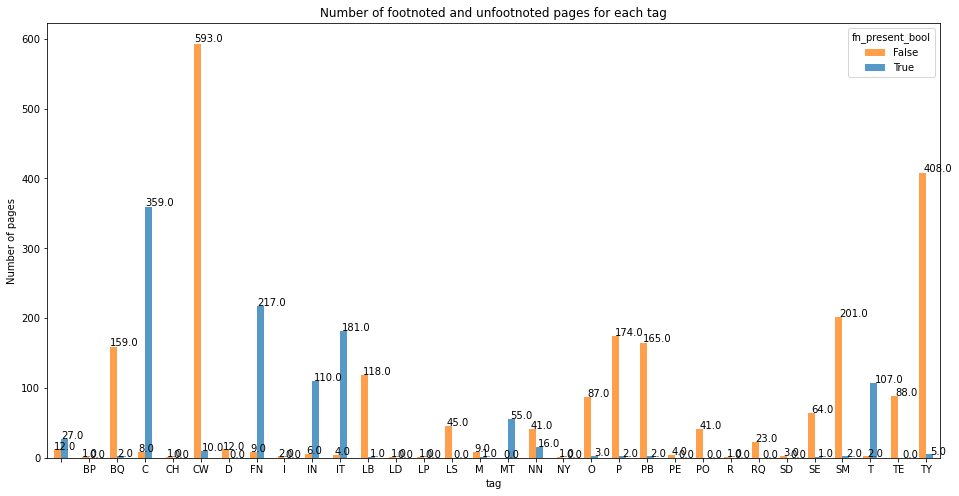

In [320]:
# Plot our tags
ax = tags_unstacked_df.plot(kind='bar', color=['tab:orange','tab:blue'], title="Number of footnoted and unfootnoted pages for each tag", figsize=(16,8), alpha=0.75, rot=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.ylabel("Number of pages")

In [508]:
just_footnotes = one_footnote_tagged_MR_df.loc[((one_footnote_tagged_MR_df['tag'] == 'C') | (one_footnote_tagged_MR_df['tag'] == 'T') | (one_footnote_tagged_MR_df['tag'] == 'IT') | (one_footnote_tagged_MR_df['tag'] == 'IN') | (one_footnote_tagged_MR_df['tag'] == 'MT'))]

### Visualization of the proportion of footnote types in one-footnote-subset

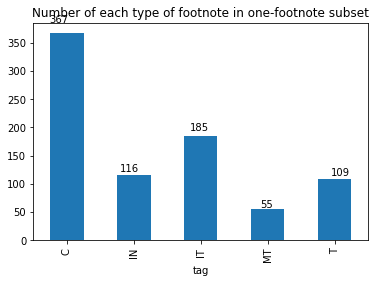

In [518]:
# Group tags using our boolean column, "fn_present"
#just_footnotes = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['footnotes_present'] == 1]
ax =just_footnotes.groupby(['tag'])['footnotes_present'].count().plot(kind='bar', title="Number of each type of footnote in one-footnote subset")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.05))

## What tags appear together?
### First, process our tag data


In [517]:
# Adding a new column called "tag" concatenating the results from "tags" and
# "Unanamed: 17" the secondary tag columns. 
one_footnote_tagged_new_df = one_footnote_tagged_df
one_footnote_tagged_new_df['tag'] = one_footnote_tagged_df[one_footnote_tagged_df.columns[16:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
one_footnote_tagged_new_df.head() 

,Unnamed: 0,Filename,DocumentID,ESTC_ID,Date,Title,Vol_Number,Author,Imprint,Field_Headings,fn_pages,nofn_pages,TableName,fn.percent,decade,footnotes_present,tags,Unnamed: 17,Unnamed: 18,tag
0,5098,0000100701.xml,100701,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 1,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",1,259,Manifest_LitAndLang2,0.003846,1770,1,"[C, IT]",NaN,NaN,"['C', ' IT'],['C', ' IT']"
1,5099,0000100702.xml,100702,T134638,1779,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 2,"Bicknell, Alexander","London : printed for G. Riley; and sold by F. Newbery, 1779.","Spenser, Edmund,, 1552?-1599, Adaptations",1,261,Manifest_LitAndLang2,0.003817,1770,0,[CW],NaN,NaN,"['CW'],['CW']"
2,5100,0000100800.xml,100800,T112791,1788,"Ismene and Ismenias, a novel translated from the French by L. H. Le Moine, ...",0,"Eustathius, Macrembolites","London [i.e. Paris] : et se trouve <c3><a0> Paris, chez Cazin, 1788.","Eustathius,, Macrembolites,, 12th cent., De Ismeniae et Ismenes amoribus libri XI, Early works t...",1,211,Manifest_LitAndLang2,0.004717,1780,0,"[BQ, P, TY, TE]",NaN,NaN,"['BQ', ' P', ' TY', ' TE'],['BQ', ' P', ' TY', ' TE']"
3,450,0000200500.xml,200500,T128705,1791,"Scelta di novelle di Giovanni Boccaccio, fatta dal Dottore Giuseppe Giannini.",0,"Boccaccio, Giovanni","In Londra : presso Francesco Wingrave, successore di Giovanni Nourse, Nella Strada detta Strand,...","Italian fiction, 18th century",1,306,Manifest_LitAndLang1,0.003257,1790,0,[SE],NaN,NaN,"['SE'],['SE']"
4,453,0000200700.xml,200700,T128696,1741,"The decameron, or ten days entertainment of Boccace. Translated from the Italian.",0,"Boccaccio, Giovanni","London : printed for R. Dodsley, at Tully's Head in Pall-Mall, MDCCXLI. [1741].","Wood-engraving, English, Specimens, 17th century",1,600,Manifest_LitAndLang1,0.001664,1740,2,NaN,NaN,NaN,


In [322]:
one_footnote_tagged_new_df['tag'].value_counts().to_csv('multi-tag-categories.csv')

In [323]:
## Exported to Open-Refine, where I used k-means clustering to match different sequences of tag combinations 
## eg a footnote tagged CW, PB is the same as PB, CW
## Re-importing cleaned data below

In [324]:
multi_tagged_footnotes = pd.read_csv('multi-tag-categories-cleaned.csv', encoding='utf-8')

### Plot the counts of each combination of tags in our dataset

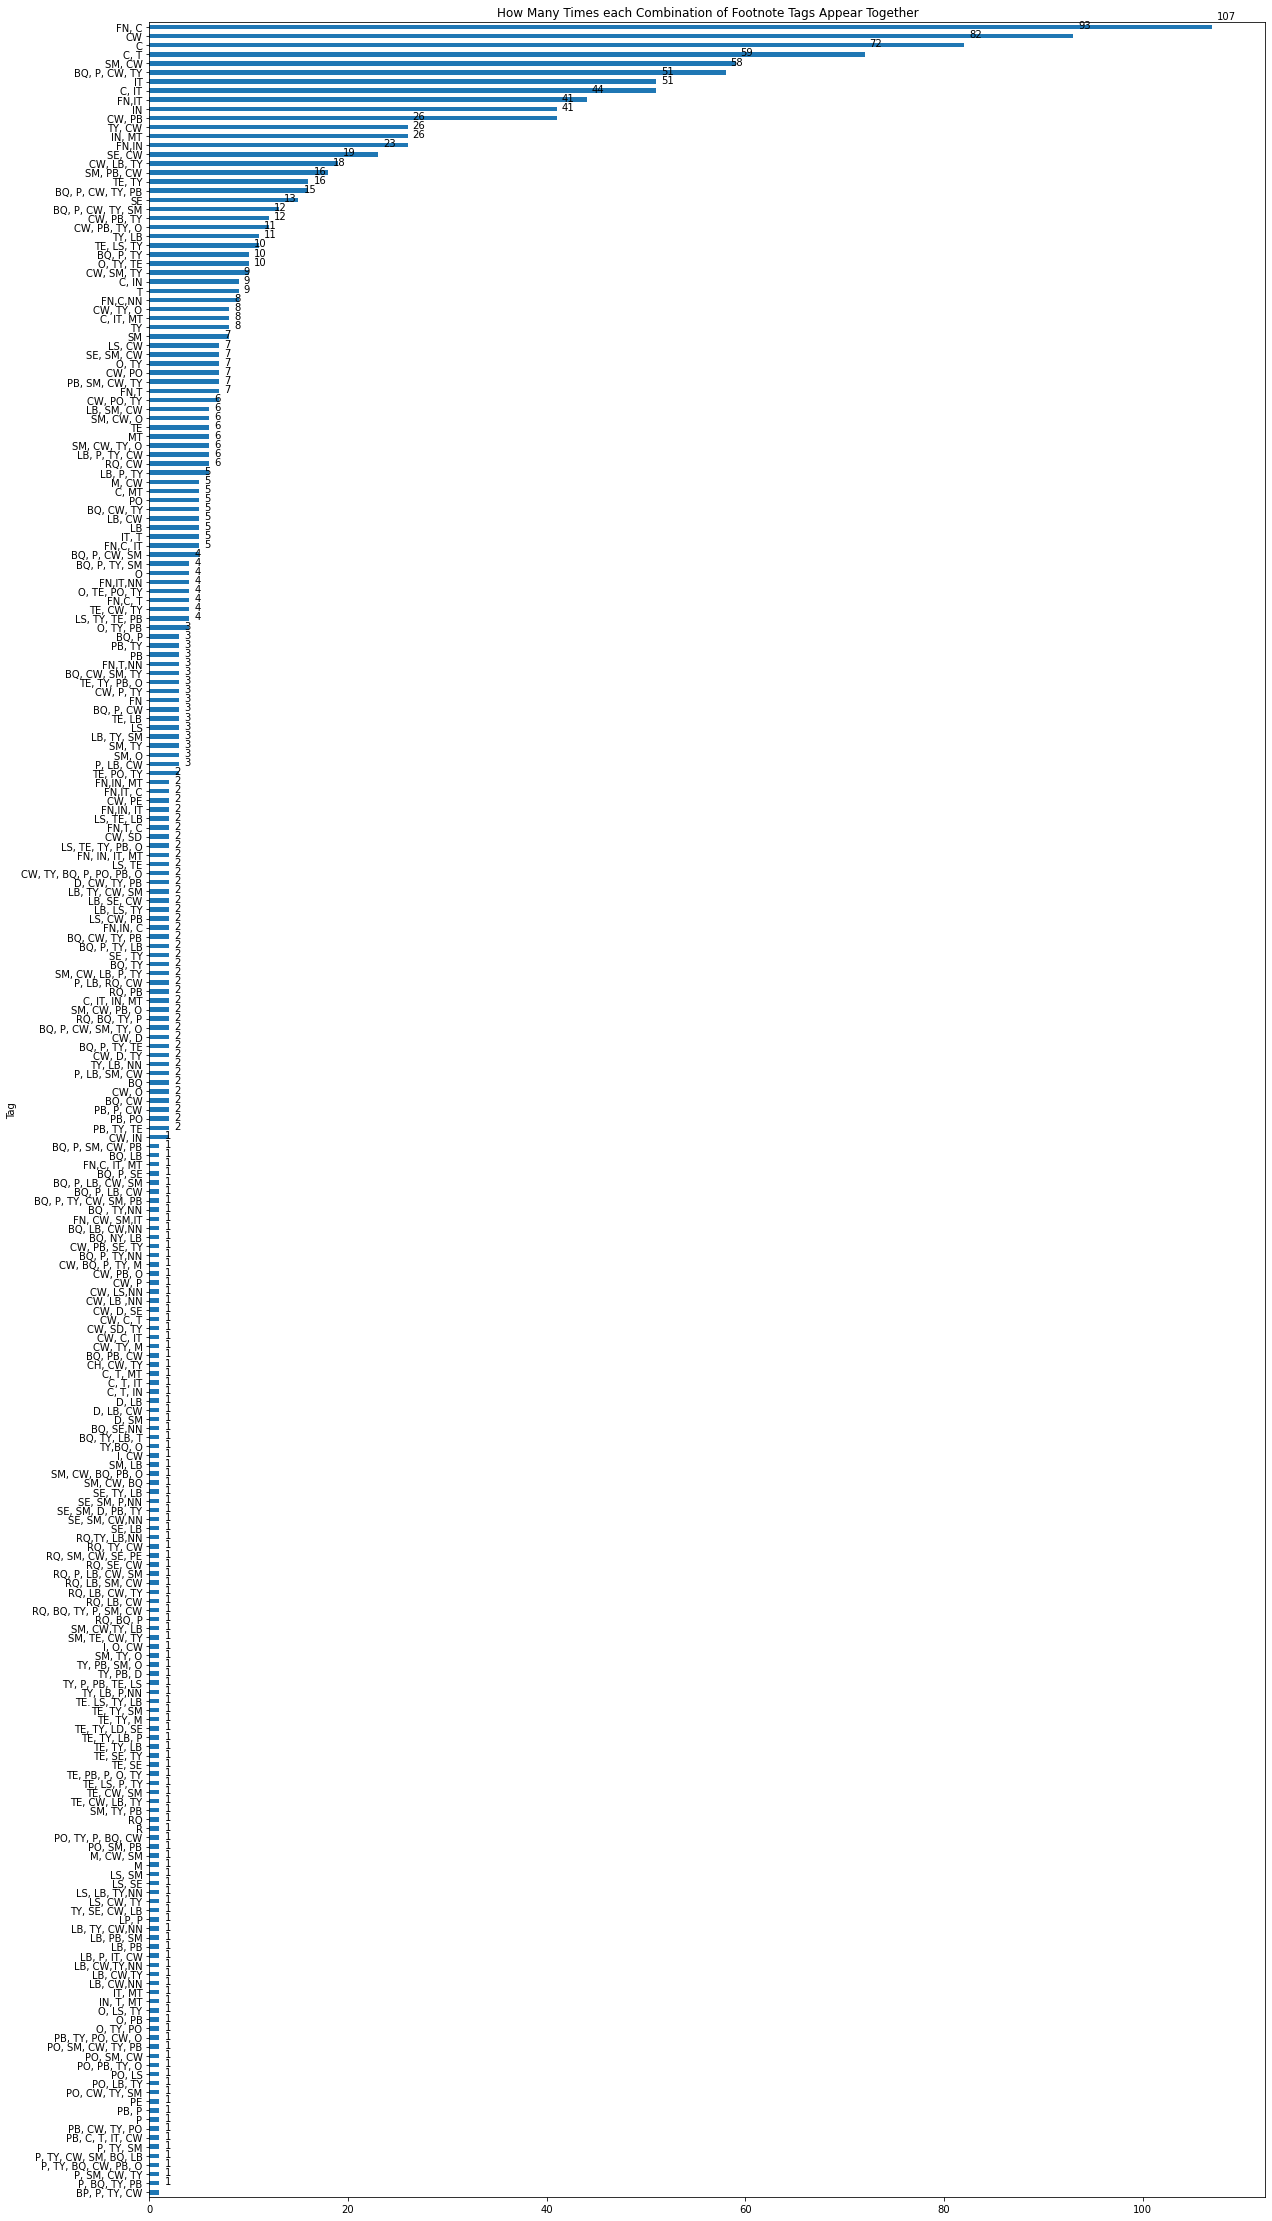

In [325]:
# Plot the combinations of tags
ax = multi_tagged_footnotes.groupby('Tag')['Count'].sum().sort_values(ascending=True)\
.plot(kind='barh', figsize=(20,40), title="How Many Times each Combination of Footnote Tags Appear Together")
for p in ax.patches:
    ax.annotate(p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

In [326]:
multi_tagged_footnotes

,Count,Tag
0,103,"FN, C"
1,91,CW
2,82,C
3,64,"C, T"
4,51,IT
5,45,"SM, CW"
6,43,"FN,IT"
7,41,IN
8,35,"C, IT"
9,34,NaN


### Top 25 Tag Combinations for multiple tags and double-tagged footnotes

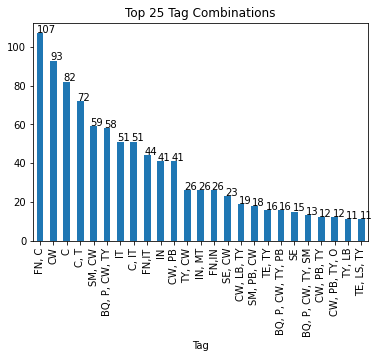

In [327]:
ax = multi_tagged_footnotes.groupby('Tag')['Count'].sum().sort_values(ascending=False).head(25).plot(kind='bar', title="Top 25 Tag Combinations")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

## Stats on our tagged one-footnote dataset 
### Number of total footnotes in the one-footnote subset

In [328]:
print("Number of total volumes in our one-footnote subset:")
one_footnote_tagged_df['footnotes_present'].count()

Number of total volumes in our one-footnote subset:


1484

### How many volumes in this subset actually have foonotes: 

In [329]:
print("Number of volumes in subset WITH footnotes:")
one_footnote_tagged_df[one_footnote_tagged_df['footnotes_present'] != 0]['tag'].count()

Number of volumes in subset WITH footnotes:


624

### How many volumes in this subset DO NOT have foonotes: 

In [330]:
print("Number of volumes in subset WITHOUT footnotes:")
one_footnote_tagged_df[one_footnote_tagged_df['footnotes_present'] == 0]['tag'].count()

Number of volumes in subset WITHOUT footnotes:


860

### How many volumes in this subset are tagged "Not a Novel"

In [331]:
print('Number of volumes in subset tagged "Not a Novel"')
one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'NN']['tag'].count() # note the difference n dataframe

Number of volumes in subset tagged "Not a Novel"


57

### What are the top tags in this dataset?

In [332]:
# Print out the number of times each tag appears in our dataset
print('Tags in our dataset, by count:')
one_footnote_tagged_MR_df['tag'].value_counts()

Tags in our dataset, by count:


CW    603
TY    413
C     367
FN    226
SM    203
IT    185
P     176
PB    167
BQ    161
LB    119
IN    116
T     109
O      90
TE     88
SE     65
NN     57
MT     55
LS     45
PO     41
       39
RQ     23
D      12
M      10
PE      4
SD      3
I       2
R       1
CH      1
LD      1
NY      1
BP      1
LP      1
Name: tag, dtype: int64

## Analysis of tags and clusters of tags

### Metatextual Footnotes

In [333]:
# Let's look at just the MT tags
metatextual_footnotes_df = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'MT']

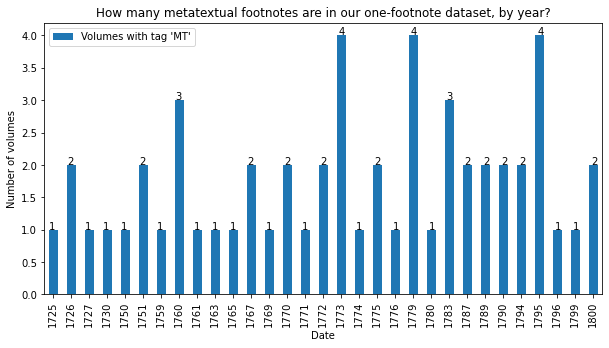

In [334]:
# Plot the nubmer of MT tagged footnotes in each year
ax = metatextual_footnotes_df.groupby('Date')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many metatextual footnotes are in our one-footnote dataset, by year?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Date")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'MT'"])

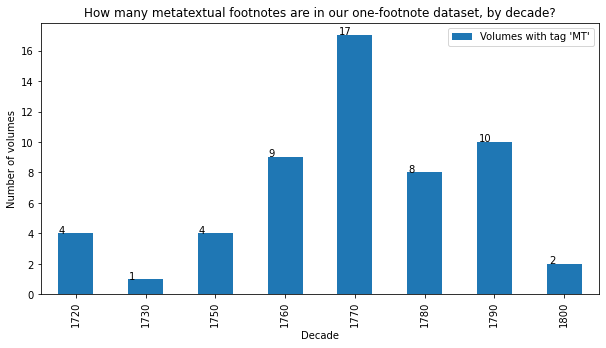

In [335]:
# Plot the number of MT tagged footnotes in each decade
ax = metatextual_footnotes_df.groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many metatextual footnotes are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'MT'"])

### Let's run a statistical test on these results

In [336]:
# Import library
from scipy import stats
from scipy.stats import chi2_contingency

In [337]:
# Create a dataframe of all footnotes w/o metatextual footnotes
not_metatextual_footnotes_df = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] != 'MT']
not_metatextual_footnotes_by_decade = not_metatextual_footnotes_df.groupby('decade')[['tag']].count().reset_index()
metatextual_footnotes_by_decade = metatextual_footnotes_df.groupby('decade')[['tag']].count().reset_index()

In [338]:
# Merge the two dataframes
merged_MT = pd.merge_ordered(not_metatextual_footnotes_by_decade,metatextual_footnotes_by_decade, on='decade').fillna(0)
merged_MT

,decade,tag_x,tag_y
0,1690,3,0.0
1,1700,54,0.0
2,1710,73,0.0
3,1720,109,4.0
4,1730,85,1.0
5,1740,157,0.0
6,1750,275,4.0
7,1760,414,9.0
8,1770,507,17.0
9,1780,583,8.0


In [339]:
(merged_MT['tag_x'].sum())/(merged_MT['tag_y'].sum())

60.54545454545455

In [340]:
# Let's run a chi2 goodness of fit test
stats.chisquare(f_obs=merged_MT['tag_y'], f_exp=merged_MT['tag_x']/60)

Power_divergenceResult(statistic=19.131469618253103, pvalue=0.0587740282283168)

The p-value of 0.058 is right at the threshold (0.05) of a statistical significance, meaning that there is **a slight chance that the distribution of metatextual foototes differs from the general pattern of footnote distribution.**

### What are the titles of the works with metatextual footnotes?

In [341]:
pd.options.display.max_colwidth = 100
print('Number of volumes with metatexual footnotes in our one-footnote dataset:')
metatextual_footnotes_df['Title'].count()

Number of volumes with metatexual footnotes in our one-footnote dataset:


55

In [342]:
pd.set_option('display.max_rows', 200)
print('Titles of volumes with metatexual footnotes (in our one-footnote dataset):')
metatextual_footnotes_df[['Title', 'Vol_Number']]

Titles of volumes with metatexual footnotes (in our one-footnote dataset):


,Title,Vol_Number
30,The farmer's son of Kent. A tale. In two volumes. ...,Volume 2
57,"The life of the Countess of G. By Gellert. Translated from the German, by a lady. ...",Volume 1
89,L'art de corriger et de rendre les hommes constans. Prix 30 sols.,0
130,"Delia, a pathetic and interesting tale. In Four Volumes ...",Volume 2
140,"Letters between an English lady and her friend at Paris. In which are contained, The memoirs of ...",Volume 1
142,"The history of a woman of quality: or, the adventures of Lady Frail. By an impartial hand.",0
163,"He is found at last: or, memoirs of the Beverley family. In two volumes. ...",Volume 2
218,"The life and opinions of Tristram Shandy, gentleman. In three volumes. ...",Volume 5
263,History of Lady Bettesworth and Captain Hastings. In a series of letters. In two volumes. ...,Volume 1
271,"Radzivil, a romance. Translated from the Russ of the celebrated M. Wocklow. In three volumes. ...",Volume 1


#### Export the list of filenames for metatextual footnotes

In [343]:
metatextual_footnotes_df['Filename'].to_csv('../metatextual_footnotes_filenames.csv')

### Intertextual Footnotes

In [344]:
# Let's look at the 'IT' tag
intertextual_footnotes_df = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'IT']

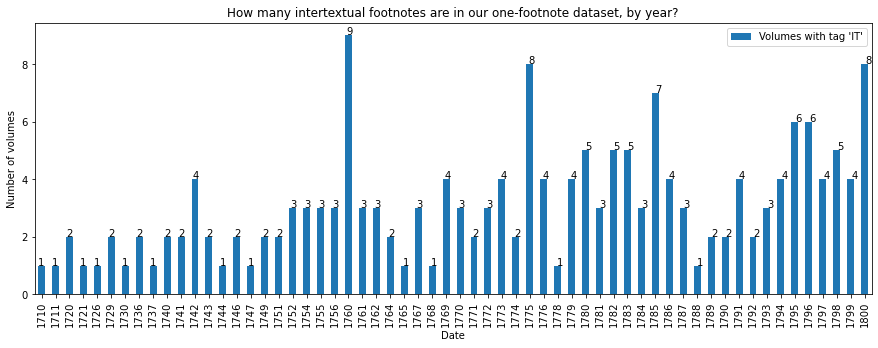

In [345]:
# Plot the nubmer of IT tagged footnotes in each year
ax = intertextual_footnotes_df.groupby('Date')[['tag']].count().plot(kind="bar", figsize=(15, 5), title="How many intertextual footnotes are in our one-footnote dataset, by year?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Date")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'IT'"])

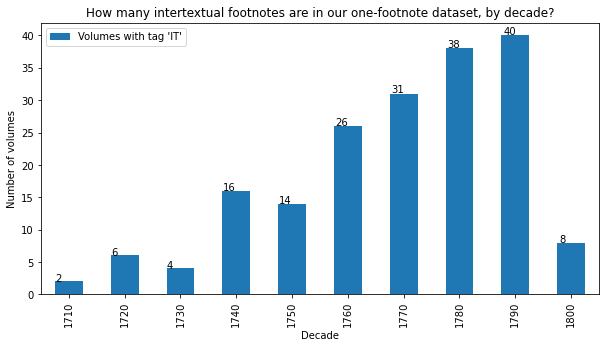

In [346]:
# Plot the nubmer of IT tagged footnotes in each decade

ax = intertextual_footnotes_df.groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many intertextual footnotes are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'IT'"])

### Statistical tests!

In [347]:
# Create a dataframe of all footnotes w/o intertextual footnotes
not_intertextual_footnotes_df = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] != 'IT']
not_intertextual_footnotes_by_decade = not_intertextual_footnotes_df.groupby('decade')[['tag']].count().reset_index()
intertextual_footnotes_by_decade = intertextual_footnotes_df.groupby('decade')[['tag']].count().reset_index()
# Merge the two dataframes
merged_IT = pd.merge_ordered(not_intertextual_footnotes_by_decade,intertextual_footnotes_by_decade, on='decade').fillna(0)
merged_IT

,decade,tag_x,tag_y
0,1690,3,0.0
1,1700,54,0.0
2,1710,71,2.0
3,1720,107,6.0
4,1730,82,4.0
5,1740,141,16.0
6,1750,265,14.0
7,1760,397,26.0
8,1770,493,31.0
9,1780,553,38.0


In [348]:
merged_IT['tag_x'].sum() / merged_IT['tag_y'].sum()

17.2972972972973

In [349]:
# Let's run a chi2 goodness of fit test
stats.chisquare(f_obs=merged_IT['tag_y'], f_exp=merged_IT['tag_x']/17)

Power_divergenceResult(statistic=16.15357914559367, pvalue=0.13552440097964663)

The p-value of 0.13 is  above the 0.05 threshold of statistical significance, meaning **the distribution of intertextual footnotes likely differs from the general distribution of footnotes**.

### What are the titles of the works with intertextual footnotes?

In [350]:
print('Number of volumes with intertextual footnotes in our one-footnote dataset:')
intertextual_footnotes_df['Title'].count()

Number of volumes with intertextual footnotes in our one-footnote dataset:


185

In [351]:
print('Titles of volumes with intertextual footnotes (in our one-footnote dataset):')
intertextual_footnotes_df[['Title','Vol_Number']]

Titles of volumes with intertextual footnotes (in our one-footnote dataset):


,Title,Vol_Number
0,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 1
11,Les delices du sentiment; or the passionate lovers: in a series of letters which have recently p...,0
19,"Pigmalion, ou la statue anim<c3><a9>e.",0
25,"The confessions of James Baptiste Couteau, citizen of France, written by himself: and translated...",Volume 2
30,The farmer's son of Kent. A tale. In two volumes. ...,Volume 2
34,"Le ministre de Wakefield, histoire suppos<c3><a9>e <c3><a9>crite par lui-m<c3><aa>me. ...",Volume 2
53,"The country seat; or, summer evenings entertainments. Translated from the French. In two volumes...",Volume 2
60,"The female Quixote; or, the adventures of Arabella. In two volumes. ...",Volume 1
79,James the fatalist and his master. Translated from the French of Diderot. In three volumes. ...,Volume 2
86,"Diana de Castro; a novel. Written originally in French. By Mr. Huet, Antient Bishop of Avranches.",0


#### Export the list of filenames for intertextual footnotes

In [352]:
intertextual_footnotes_df['Filename'].to_csv('../intertextual_footnotes_filenames.csv')

### Intratextual Footnotes

In [353]:
# Let's look at the 'IN' tag
intratextual_footnotes_df = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'IN']

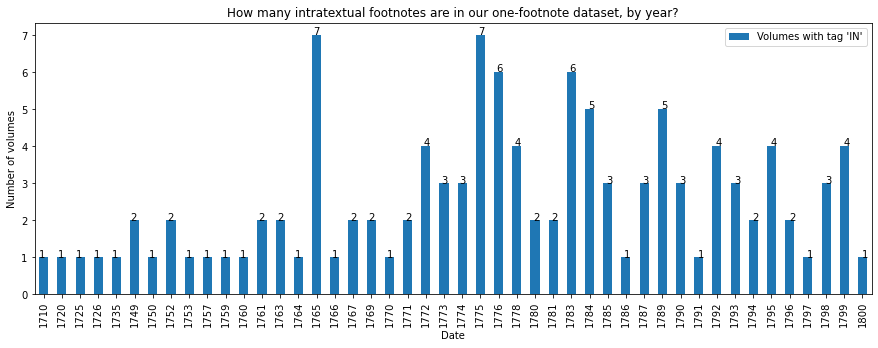

In [354]:
# Plot the nubmer of IT tagged footnotes in each year
ax = intratextual_footnotes_df.groupby('Date')[['tag']].count().plot(kind="bar", figsize=(15, 5), title="How many intratextual footnotes are in our one-footnote dataset, by year?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Date")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'IN'"])

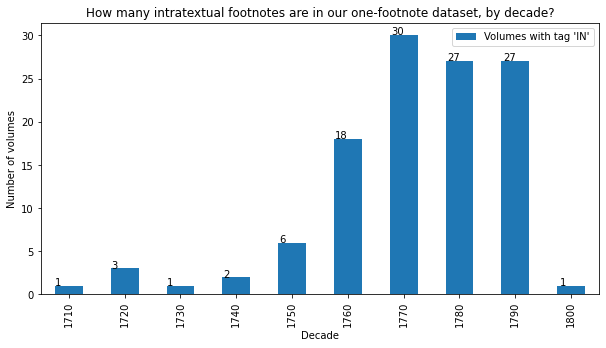

In [355]:
# Plot the nubmer of IN tagged footnotes in each decade

ax = intratextual_footnotes_df.groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many intratextual footnotes are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'IN'"])

### Statistical tests!

In [356]:
# Create a dataframe of all footnotes w/o intratextual footnotes
not_intratextual_footnotes_df = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] != 'IN']
not_intratextual_footnotes_by_decade = not_intratextual_footnotes_df.groupby('decade')[['tag']].count().reset_index()
intratextual_footnotes_by_decade = intratextual_footnotes_df.groupby('decade')[['tag']].count().reset_index()
# Merge the two dataframes
merged_IN = pd.merge_ordered(not_intratextual_footnotes_by_decade,intratextual_footnotes_by_decade, on='decade').fillna(0)
merged_IN

,decade,tag_x,tag_y
0,1690,3,0.0
1,1700,54,0.0
2,1710,72,1.0
3,1720,110,3.0
4,1730,85,1.0
5,1740,155,2.0
6,1750,273,6.0
7,1760,405,18.0
8,1770,494,30.0
9,1780,564,27.0


In [357]:
merged_IN['tag_x'].sum() / merged_IN['tag_y'].sum()

28.18103448275862

In [358]:
# Let's run a chi2 goodness of fit test
stats.chisquare(f_obs=merged_IN['tag_y'], f_exp=merged_IN['tag_x']/28)

Power_divergenceResult(statistic=24.736198382536244, pvalue=0.00996240239561025)

The p-value of 0.009 is much lower than 0.05, though it is close to 0.01, another standard cutoff for statstical significanes. What this means is that the distribution of intratextual footnotes is **probably not significantly different from the general distribution of footnotes**.

### What are the titles of the works with intratextual footnotes?

In [359]:
print('Number of volumes with intratextual footnotes in our one-footnote dataset:')
intratextual_footnotes_df['Title'].count()

Number of volumes with intratextual footnotes in our one-footnote dataset:


116

In [360]:
print('Titles of volumes with intratextual footnotes (in our one-footnote dataset):')
intratextual_footnotes_df[['Title','Vol_Number']]

Titles of volumes with intratextual footnotes (in our one-footnote dataset):


,Title,Vol_Number
49,"The life and strange surprising adventures of Robinson Crusoe; of York, mariner: who lived eight...",Volume 2
54,"Opuscule d'un c<c3><a9>l<c3><a9>bre auteur Egyptien. Contenant l'histoire d'Orph<c3><a9>e, par l...",0
89,L'art de corriger et de rendre les hommes constans. Prix 30 sols.,0
113,"The invasion; or, what might have been. A novel. In two volumes. ...",Volume 1
130,"Delia, a pathetic and interesting tale. In Four Volumes ...",Volume 2
136,"Les avantures de Gil Blas de Santillane. Par Monsieur Le Sage. Nouvelle edition, avec des figures.",Volume 3
140,"Letters between an English lady and her friend at Paris. In which are contained, The memoirs of ...",Volume 1
148,Burton-Wood. In a series of letters. By a lady. ...,Volume 1
160,"Orlando and Lavinia: or, the libertine. A novel. In four volumes. By a lady. ...",Volume 4
163,"He is found at last: or, memoirs of the Beverley family. In two volumes. ...",Volume 2


#### Export the list of filenames for intraxtual footnotes

In [361]:
intratextual_footnotes_df['Filename'].to_csv('../intratextual_footnotes_filenames.csv')

### Contextual Footnotes

In [362]:
# Let's look at the 'C' tag
contextual_footnotes_df = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'C']

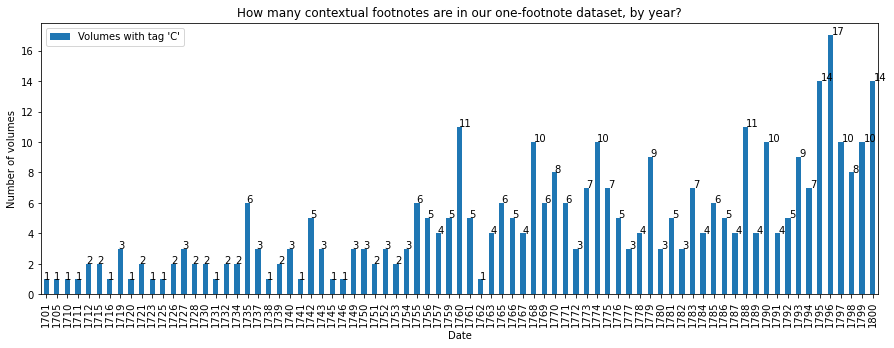

In [363]:
# Plot the nubmer of C tagged footnotes in each year
ax = contextual_footnotes_df.groupby('Date')[['tag']].count().plot(kind="bar", figsize=(15, 5), title="How many contextual footnotes are in our one-footnote dataset, by year?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Date")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'C'"])

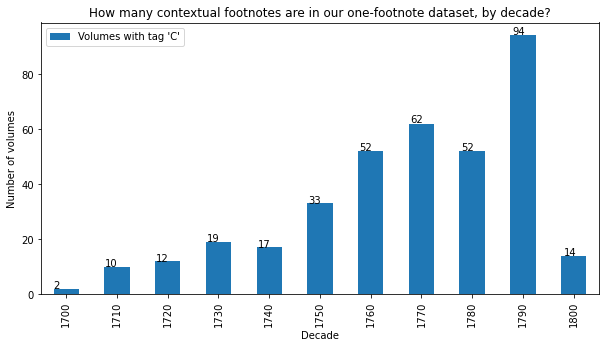

In [364]:
# Plot the nubmer of C tagged footnotes in each decade

ax = contextual_footnotes_df.groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many contextual footnotes are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'C'"])

### Statistical tests!

In [365]:
# Create a dataframe of all footnotes w/o contextual footnotes
not_contextual_footnotes_df = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] != 'C']
not_contextual_footnotes_by_decade = not_contextual_footnotes_df.groupby('decade')[['tag']].count().reset_index()
contextual_footnotes_by_decade = contextual_footnotes_df.groupby('decade')[['tag']].count().reset_index()
# Merge the two dataframes
merged_C = pd.merge_ordered(not_contextual_footnotes_by_decade,contextual_footnotes_by_decade, on='decade').fillna(0)
merged_C

,decade,tag_x,tag_y
0,1690,3,0.0
1,1700,52,2.0
2,1710,63,10.0
3,1720,101,12.0
4,1730,67,19.0
5,1740,140,17.0
6,1750,246,33.0
7,1760,371,52.0
8,1770,462,62.0
9,1780,539,52.0


In [366]:
merged_C['tag_x'].sum() / merged_C['tag_y'].sum()

8.223433242506813

In [367]:
# Let's run a chi2 goodness of fit test
stats.chisquare(f_obs=merged_C['tag_y'], f_exp=merged_C['tag_x']/8)

Power_divergenceResult(statistic=24.089556173412042, pvalue=0.012360877492241623)

The p-value of 0.01 is lower than 0.05. What this means is that the distribution of contextual footnotes is **probably not significantly different from the general distribution of footnotes**.

### What are the titles of the works with contextual footnotes?

In [368]:
print('Number of volumes with contextual footnotes in our one-footnote dataset:')
contextual_footnotes_df['Title'].count()

Number of volumes with contextual footnotes in our one-footnote dataset:


367

In [369]:
print('Titles of volumes with contextual footnotes (in our one-footnote dataset):')
contextual_footnotes_df[['Title','Vol_Number']]

Titles of volumes with contextual footnotes (in our one-footnote dataset):


,Title,Vol_Number
0,Prince Arthur: an allegorical romance. The story from Spenser. In two volumes. ...,Volume 1
10,"Lettres de Sophie et du Chevalier de **, pour servir de suppl<c3><a9>ment aux Lettres du Marquis...",Volume 2
12,"Female banishment: or, the woman hater. Originally wrote by the Chevalier de Mouhy, ... In two v...",Volume 1
13,"Female banishment: or, the woman hater. Originally wrote by the Chevalier de Mouhy, ... In two v...",Volume 2
14,The illustrious French lovers; being the true histories of the amours of several French persons ...,Volume 1
...,...,...
1463,Short rules for attaining the Italian language: with a course of lectures. By Sig. Cosmetti.,0
1468,"The vicar of Wakefield, a tale supposed to be written by himself. Accentuirt von J. Ebers.",0
1471,"The expedition of Humphry Clinker. By Tobias Smollet, M.D. With ten plates, by T. Rowlandson. In...",Volume 1
1472,"Beauties in prose and verse: or, the new, pleasing, and entertaining collection, selected from t...",0


#### Export the list of filenames for contextual footnotes

In [370]:
contextual_footnotes_df['Filename'].to_csv('../contextual_footnotes_filenames.csv')

### Translation Footnotes

In [371]:
# Let's look at the 'T' tag
translation_footnotes_df = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'T']

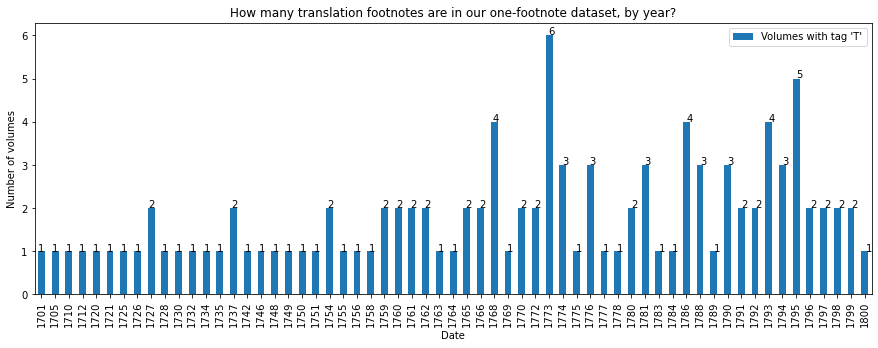

In [372]:
# Plot the nubmer of T tagged footnotes in each year
ax = translation_footnotes_df.groupby('Date')[['tag']].count().plot(kind="bar", figsize=(15, 5), title="How many translation footnotes are in our one-footnote dataset, by year?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Date")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'T'"])

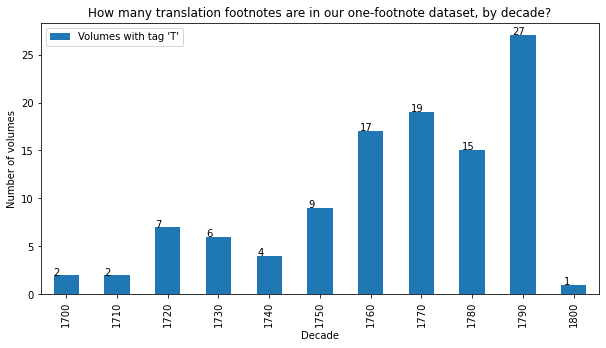

In [373]:
# Plot the nubmer of T tagged footnotes in each decade

ax = translation_footnotes_df.groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many translation footnotes are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'T'"])

### Statistical tests!

In [374]:
# Create a dataframe of all footnotes w/o translation footnotes
not_translation_footnotes_df = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] != 'T']
not_translation_footnotes_by_decade = not_translation_footnotes_df.groupby('decade')[['tag']].count().reset_index()
translation_footnotes_by_decade = translation_footnotes_df.groupby('decade')[['tag']].count().reset_index()
# Merge the two dataframes
merged_T = pd.merge_ordered(not_translation_footnotes_by_decade,translation_footnotes_by_decade, on='decade').fillna(0)
merged_T

,decade,tag_x,tag_y
0,1690,3,0.0
1,1700,52,2.0
2,1710,71,2.0
3,1720,106,7.0
4,1730,80,6.0
5,1740,153,4.0
6,1750,270,9.0
7,1760,406,17.0
8,1770,505,19.0
9,1780,576,15.0


In [375]:
merged_T['tag_x'].sum() / merged_T['tag_y'].sum()

30.05504587155963

In [376]:
# Let's run a chi2 goodness of fit test
stats.chisquare(f_obs=merged_T['tag_y'], f_exp=merged_T['tag_x']/30)

Power_divergenceResult(statistic=13.820342501015176, pvalue=0.24309458635770523)

The p-value of 0.24 is higher than 0.05. What this means is that the distribution of intratextual footnotes is **likely significantly different from the general distribution of footnotes**.

### What are the titles of the works with translation footnotes?

In [377]:
print('Number of volumes with translation footnotes in our one-footnote dataset:')
translation_footnotes_df['Title'].count()

Number of volumes with translation footnotes in our one-footnote dataset:


109

In [378]:
print('Titles of volumes with translation footnotes (in our one-footnote dataset):')
translation_footnotes_df[['Title','Vol_Number']]

Titles of volumes with translation footnotes (in our one-footnote dataset):


,Title,Vol_Number
8,Galatea a pastoral romance; imitated from Cervantes by M. de Florian. Translated by an officer.,0
10,"Lettres de Sophie et du Chevalier de **, pour servir de suppl<c3><a9>ment aux Lettres du Marquis...",Volume 2
11,Les delices du sentiment; or the passionate lovers: in a series of letters which have recently p...,0
12,"Female banishment: or, the woman hater. Originally wrote by the Chevalier de Mouhy, ... In two v...",Volume 1
14,The illustrious French lovers; being the true histories of the amours of several French persons ...,Volume 1
43,"The bachelor of Salamanca; or, memoirs of Don Cherubim de la Ronda. In three parts. Written orig...",Volume 1
45,"The gentleman 'pothecary. A true story. Done out of French, by Sir Roger L'Estrange, Knt. in the...",0
57,"The life of the Countess of G. By Gellert. Translated from the German, by a lady. ...",Volume 1
58,The history of La Rivi<c3><a8>re. Translated from the French.,0
62,"The history of the adventures of Joseph Andrews, and his friend Mr. Abraham Adams. Written in Im...",Volume 1


#### Export the list of filenames for translation footnotes

In [379]:
translation_footnotes_df['Filename'].to_csv('../translation_footnotes_filenames.csv')

## Multi-tagged pages

What tags appear with other tags?

In [380]:
multi_tagged_footnotes

,Count,Tag
0,103,"FN, C"
1,91,CW
2,82,C
3,64,"C, T"
4,51,IT
...,...,...
404,1,"LB, CW"
405,1,"CW, PO"
406,1,"LB, TY, CW, SM"
407,1,"BQ, P, CW, TY, PB"


### What tags appear on pages with CATCHWORDS (tag 'CW')?

In [381]:
# Let's look at the CW tag
pd.set_option('display.max_rows', 500)
multi_tagged_footnotes[multi_tagged_footnotes['Tag'].astype(str).str.contains("CW")].Tag.value_counts()

BQ, P, CW, TY               13
BQ, P, CW, TY, SM           11
BQ, P, CW, TY, PB           11
CW, PB, TY, O                7
SM, PB, CW                   6
CW, PB, TY                   6
CW, LB, TY                   5
TY, CW                       5
LB, P, TY, CW                5
CW, SM, TY                   4
SM, CW, TY, O                4
SE, SM, CW                   4
PB, SM, CW, TY               4
SM, CW                       3
BQ, CW, TY                   3
M, CW                        3
SE, CW                       3
LS, CW                       3
LB, SM, CW                   3
RQ, CW                       3
CW, PO, TY                   3
CW, TY, O                    3
BQ, P, CW, SM                3
TE, CW, TY                   3
CW, PB                       2
CW, P, TY                    2
P, LB, RQ, CW                2
SM, CW, LB, P, TY            2
PB, P, CW                    2
BQ, CW, TY, PB               2
LB, SE, CW                   2
BQ, CW                       2
D, CW, T

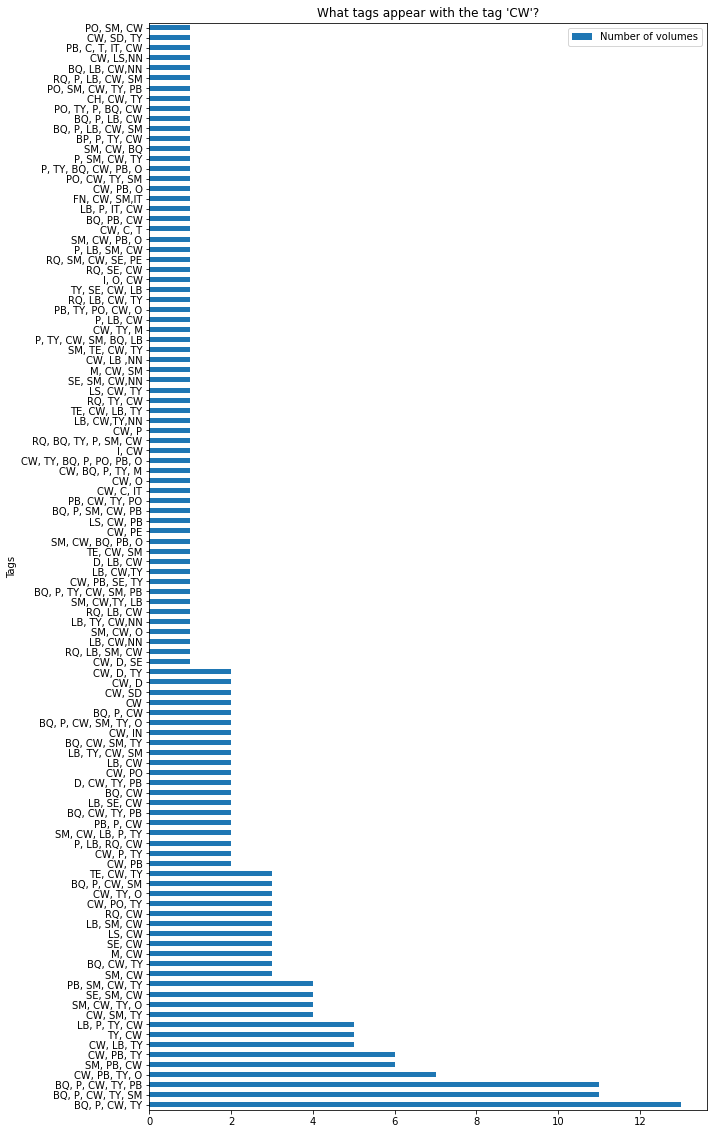

In [382]:
multi_tagged_footnotes[multi_tagged_footnotes['Tag'].astype(str).str.contains("CW")].Tag.value_counts().plot(kind="barh", title="What tags appear with the tag 'CW'?", figsize=(10, 20))\
.set_ylabel("Tags")
plt.legend(["Number of volumes"])

### What tags appear with TYPOGRAPHY (the tag 'TY')?

In [383]:
# Let's look at the TY tag
pd.set_option('display.max_rows', 500)
multi_tagged_footnotes[multi_tagged_footnotes['Tag'].astype(str).str.contains("TY")].Tag.value_counts()

BQ, P, CW, TY               13
BQ, P, CW, TY, SM           11
BQ, P, CW, TY, PB           11
BQ, P, TY                    7
CW, PB, TY, O                7
CW, PB, TY                   6
CW, LB, TY                   5
TY, CW                       5
LB, P, TY, CW                5
LB, P, TY                    4
CW, SM, TY                   4
PB, SM, CW, TY               4
SM, CW, TY, O                4
LS, TY, TE, PB               4
O, TE, PO, TY                3
TY, LB                       3
BQ, CW, TY                   3
TE, CW, TY                   3
LB, TY, SM                   3
CW, TY, O                    3
O, TY, PB                    3
CW, PO, TY                   3
SM, TY                       2
CW, D, TY                    2
BQ, P, TY, SM                2
RQ, BQ, TY, P                2
TE, LS, TY                   2
SE , TY                      2
LB, TY, CW, SM               2
SM, CW, LB, P, TY            2
BQ, TY                       2
BQ, CW, TY, PB               2
O, TY, T

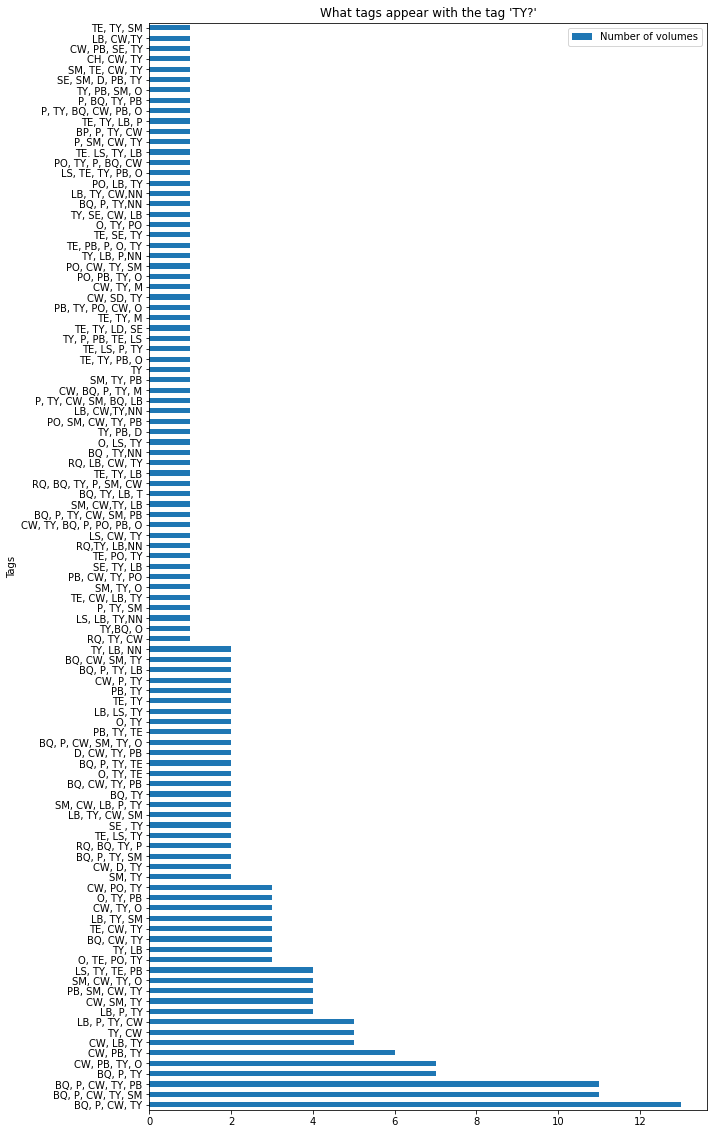

In [384]:
multi_tagged_footnotes[multi_tagged_footnotes['Tag'].astype(str).str.contains("TY")].Tag.value_counts().plot(kind="barh", title="What tags appear with the tag 'TY?'", figsize=(10, 20))\
.set_ylabel("Tags")
plt.legend(["Number of volumes"])

### What tags appear with PARAGRAPH BREAKS (the tag 'PB')?

In [385]:
# Let's look at the PB tag
pd.set_option('display.max_rows', 500)
multi_tagged_footnotes[multi_tagged_footnotes['Tag'].astype(str).str.contains("PB")].Tag.value_counts()

BQ, P, CW, TY, PB           11
CW, PB, TY, O                7
CW, PB, TY                   6
SM, PB, CW                   6
LS, TY, TE, PB               4
PB, SM, CW, TY               4
O, TY, PB                    3
BQ, CW, TY, PB               2
PB, PO                       2
PB, TY                       2
D, CW, TY, PB                2
PB, TY, TE                   2
CW, PB                       2
PB, P, CW                    2
PB, P                        1
CW, TY, BQ, P, PO, PB, O     1
LB, PB, SM                   1
BQ, P, TY, CW, SM, PB        1
BQ, PB, CW                   1
RQ, PB                       1
TY, P, PB, TE, LS            1
PB, CW, TY, PO               1
PB, TY, PO, CW, O            1
P, TY, BQ, CW, PB, O         1
CW, PB, O                    1
PB                           1
TY, PB, SM, O                1
LS, TE, TY, PB, O            1
SM, TY, PB                   1
SM, CW, BQ, PB, O            1
PO, SM, CW, TY, PB           1
TY, PB, D                    1
PO, SM, 

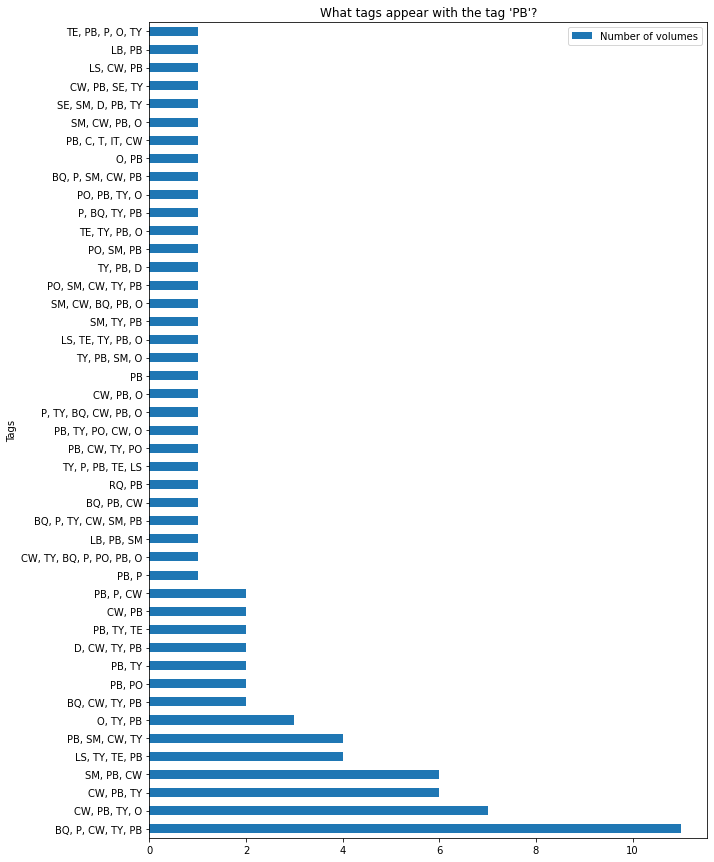

In [386]:
multi_tagged_footnotes[multi_tagged_footnotes['Tag'].astype(str).str.contains("PB")].Tag.value_counts().plot(kind="barh", title="What tags appear with the tag 'PB'?", figsize=(10, 15))\
.set_ylabel("Tags")
plt.legend(["Number of volumes"])

### What tags appear with BLOCK QUOTES (the tag 'BQ')?

In [387]:
# Let's look at the BQ tag
pd.set_option('display.max_rows', 500)
multi_tagged_footnotes[multi_tagged_footnotes['Tag'].astype(str).str.contains("BQ")].Tag.value_counts()

BQ, P, CW, TY               13
BQ, P, CW, TY, SM           11
BQ, P, CW, TY, PB           11
BQ, P, TY                    7
BQ, P, CW, SM                3
BQ, CW, TY                   3
BQ, P, TY, SM                2
RQ, BQ, TY, P                2
BQ, P, CW                    2
BQ, CW, TY, PB               2
BQ, CW, SM, TY               2
BQ, CW                       2
BQ, TY                       2
BQ, P, TY, LB                2
BQ, P, CW, SM, TY, O         2
BQ, P, TY, TE                2
BQ, LB                       1
BQ, NY, LB                   1
P, TY, CW, SM, BQ, LB        1
P, TY, BQ, CW, PB, O         1
BQ, P, TY, CW, SM, PB        1
BQ, PB, CW                   1
RQ, BQ, P                    1
TY,BQ, O                     1
SM, CW, BQ                   1
BQ , TY,NN                   1
BQ, P, LB, CW                1
P, BQ, TY, PB                1
BQ, TY, LB, T                1
BQ, P, SE                    1
BQ                           1
CW, BQ, P, TY, M             1
BQ, SE,N

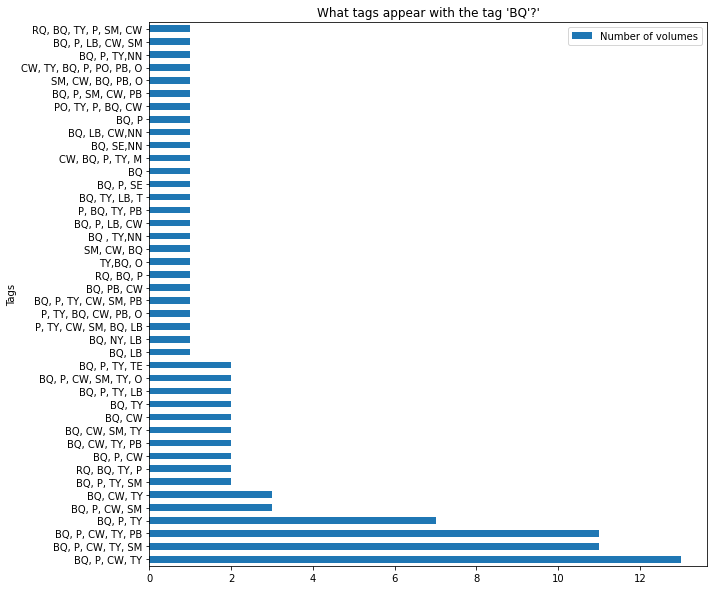

In [388]:
multi_tagged_footnotes[multi_tagged_footnotes['Tag'].astype(str).str.contains("BQ")].Tag.value_counts().plot(kind="barh", title="What tags appear with the tag 'BQ'?'", figsize=(10, 10))\
.set_ylabel("Tags")
plt.legend(["Number of volumes"])

### What tags appear with SIGNATURE MARKS (the tag 'SM')?

In [389]:
# Let's look at the SM tag
pd.set_option('display.max_rows', 500)
multi_tagged_footnotes[multi_tagged_footnotes['Tag'].astype(str).str.contains("SM")].Tag.value_counts()

BQ, P, CW, TY, SM        11
SM, PB, CW                6
PB, SM, CW, TY            4
SE, SM, CW                4
CW, SM, TY                4
SM, CW, TY, O             4
LB, SM, CW                3
SM, CW                    3
BQ, P, CW, SM             3
LB, TY, SM                3
BQ, P, CW, SM, TY, O      2
BQ, P, TY, SM             2
BQ, CW, SM, TY            2
SM, CW, LB, P, TY         2
SM, TY                    2
LB, TY, CW, SM            2
RQ, BQ, TY, P, SM, CW     1
RQ, SM, CW, SE, PE        1
BQ, P, TY, CW, SM, PB     1
SE, SM, CW,NN             1
D, SM                     1
P, LB, SM, CW             1
SM, CW, BQ, PB, O         1
SM                        1
SM, CW, O                 1
RQ, LB, SM, CW            1
SM, TY, O                 1
SM, TE, CW, TY            1
SE, SM, P,NN              1
PO, CW, TY, SM            1
TE, TY, SM                1
PO, SM, CW                1
SM, CW,TY, LB             1
BQ, P, SM, CW, PB         1
P, SM, CW, TY             1
P, TY, CW, SM, BQ, L

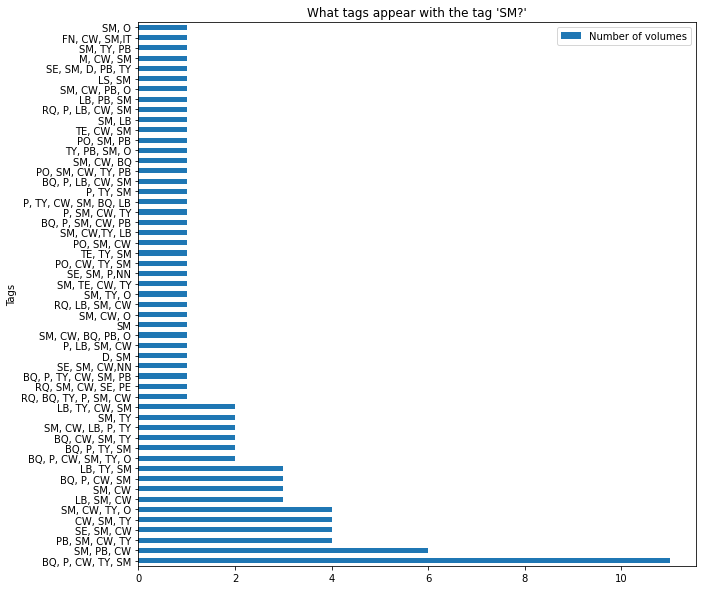

In [390]:
multi_tagged_footnotes[multi_tagged_footnotes['Tag'].astype(str).str.contains("SM")].Tag.value_counts().plot(kind="barh", title="What tags appear with the tag 'SM?'", figsize=(10, 10))\
.set_ylabel("Tags")
plt.legend(["Number of volumes"])

## Decade-by-decade breakdown of tags

### Catchwords

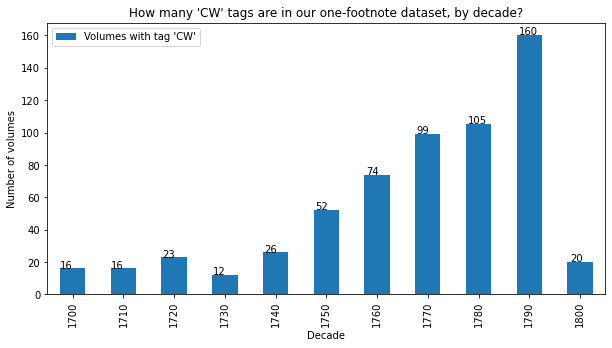

In [391]:
# Let's check how 'CW' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'CW'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'CW' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'CW'"])

### Signature Marks

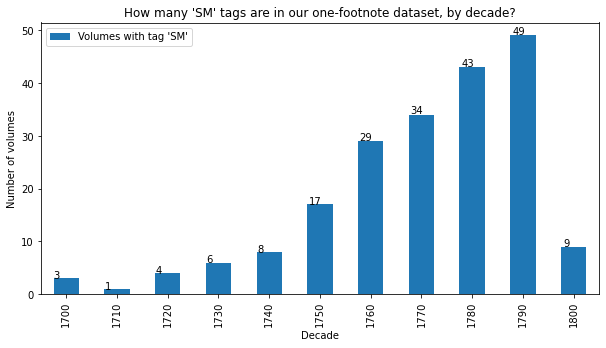

In [392]:
# Let's check how 'SM' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'SM'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'SM' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'SM'"])

### "The End"

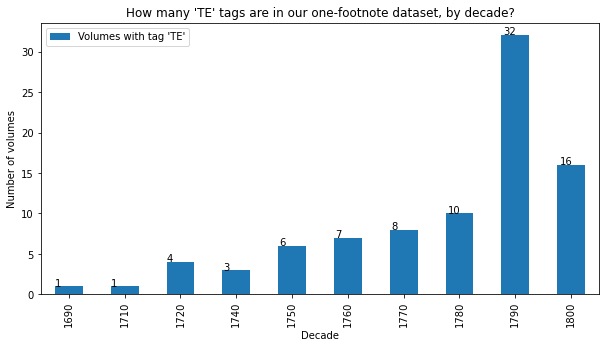

In [393]:
# Let's check how 'TE' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'TE'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'TE' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'TE'"])

### Typography

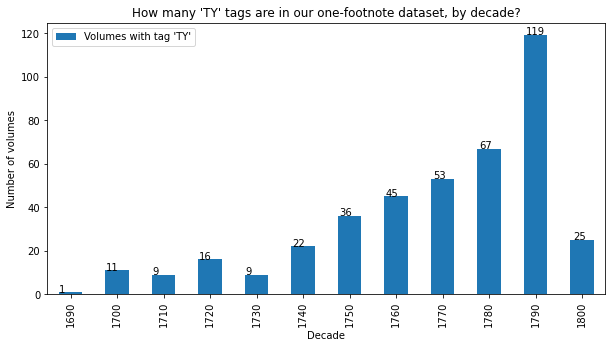

In [394]:
# Let's check how 'TE' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'TY'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'TY' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'TY'"])

### Paragraph Breaks

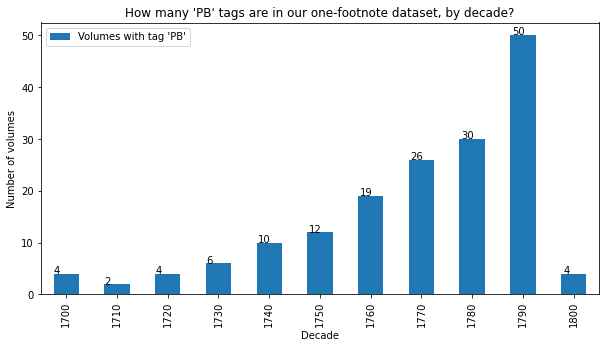

In [395]:
# Let's check how 'PB' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'PB'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'PB' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'PB'"])

### Block Quotes

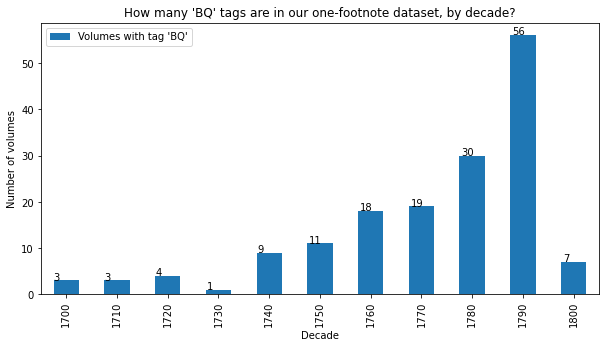

In [396]:
# Let's check how 'BQ' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'BQ'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'BQ' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'BQ'"])

### Poetry

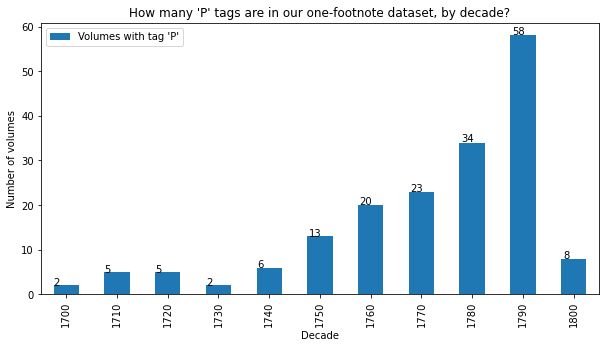

In [397]:
# Let's check how 'P' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'P'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'P' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'P'"])

### Stage Dialogue

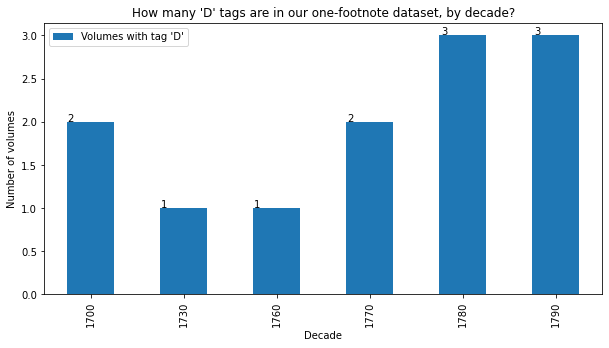

In [398]:
# Let's check how 'D' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'D'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'D' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'D'"])

### Printer's Ornaments

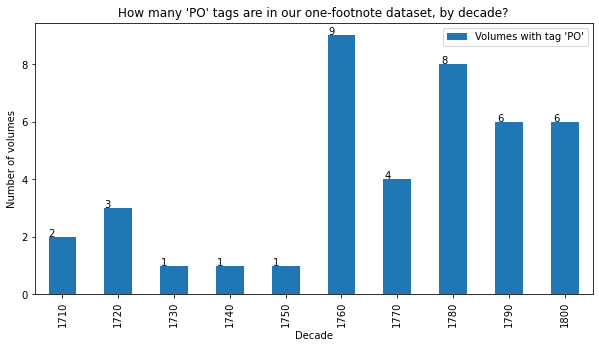

In [399]:
# Let's check how 'PO' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'PO'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'PO' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'PO'"])

### Library Stamps

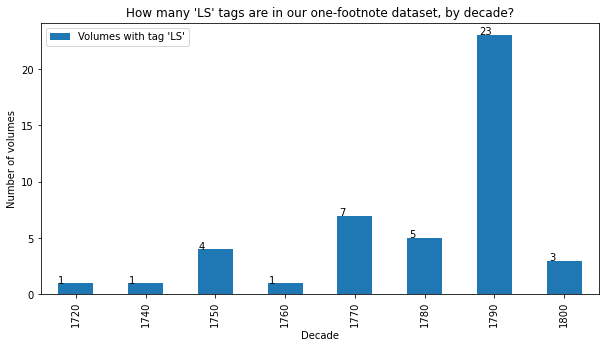

In [400]:
# Let's check how 'LS' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'LS'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'LS' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'LS'"])

### Scanning Error

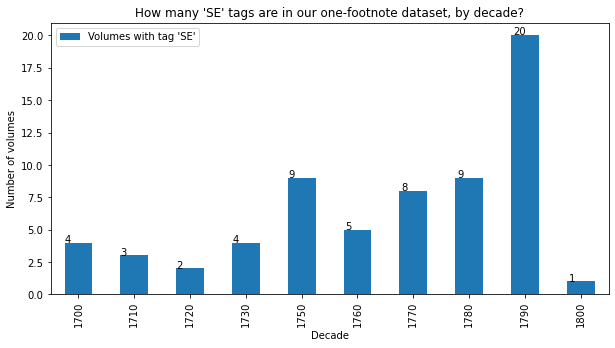

In [401]:
# Let's check how 'SE' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'SE'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'SE' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'SE'"])

### Printing Error

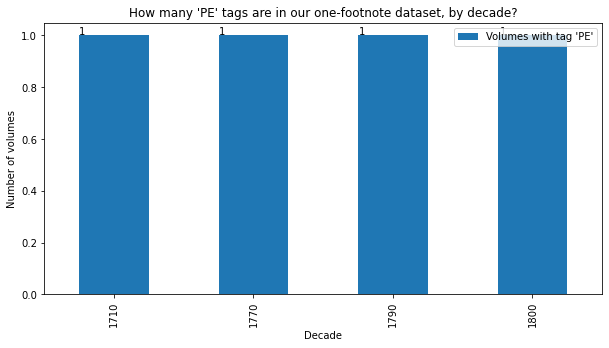

In [402]:
# Let's check how 'PE' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'PE'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'PE' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'PE'"])

### Other

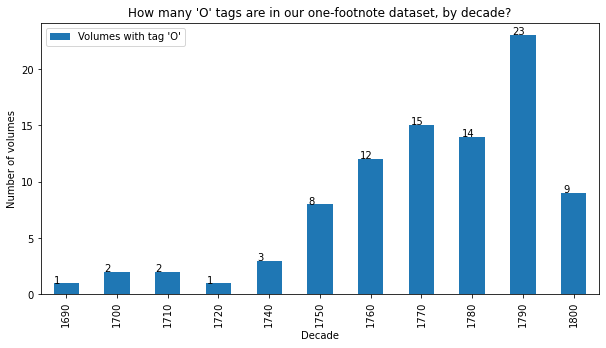

In [403]:
# Let's check how the 'O' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'O'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'O' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'O'"])

### Marginalia

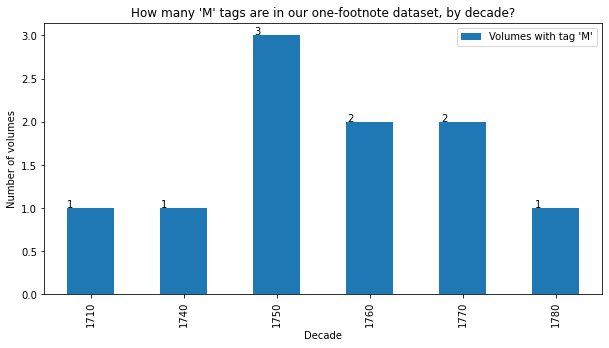

In [404]:
# Let's check how the 'M' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'M'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'M' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'M'"])

## Decade-level analysis
### 1750s

In [405]:
volumes_of_1750s = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['decade'] == 1750]

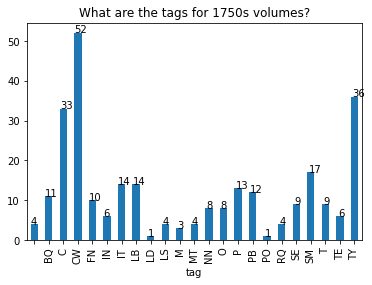

In [406]:
ax = volumes_of_1750s.groupby('tag')['Title'].count().plot(kind='bar', title="What are the tags for 1750s volumes?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### 1760s

In [407]:
volumes_of_1760s = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['decade'] == 1760]

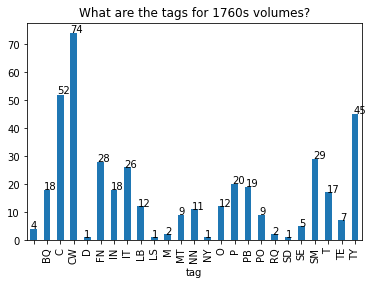

In [408]:
ax = volumes_of_1760s.groupby('tag')['Title'].count().plot(kind='bar', title="What are the tags for 1760s volumes?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### 1770s

In [409]:
volumes_of_1770s = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['decade'] == 1770]

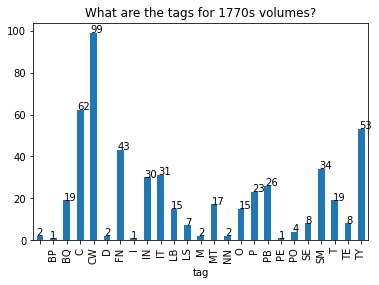

In [410]:
ax = volumes_of_1770s.groupby('tag')['Title'].count().plot(kind='bar', title="What are the tags for 1770s volumes?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

## Visualizations of where single footnotes appear in our one-footnote dataset
Where within novels do instances of single footnotes appear? And in the case of multi-volume works, does our dataset contain more instances of footnotes in certain volumes?

### How many volumes in our set have exactly one footnote?

In [411]:
## (We'll need to exclude intsancew where there are 2, 3, 4, or 5 footnotes on a single page)
print('Number of volumes in our one-footnote dataset with exactly one footnote:')
one_footnote_df[one_footnote_df['footnotes_present'] == 1].footnotes_present.count()


Number of volumes in our one-footnote dataset with exactly one footnote:


582

### In what volumes do these footnotes appear?

In [412]:
print('Where do single footnotes appear inv various volumes?')
one_footnote_df[one_footnote_df['footnotes_present'] == 1].Vol_Number.value_counts()

Where do single footnotes appear inv various volumes?


0            231
Volume 2     141
Volume 1     122
Volume 3      35
Volume 4      18
Volume 5      17
Volume 6       7
Volume 7       5
Volume 8       3
Volume 12      1
Volume 22      1
Volume 15      1
Name: Vol_Number, dtype: int64

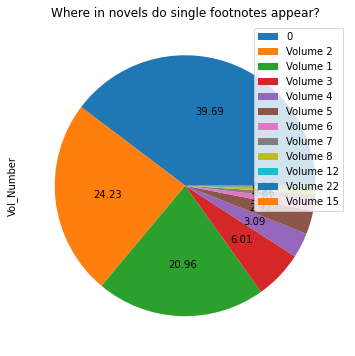

In [413]:
# Turn the table above into a dataframe
vol_dist_df = one_footnote_df[one_footnote_df['footnotes_present'] == 1].Vol_Number.value_counts()
# Plot our single footnotes data as a pie chart
ax = vol_dist_df.plot(kind='pie', autopct='%.2f', labels=None, figsize=(11,6), title="Where in novels do single footnotes appear?")
ax.legend(loc=1, labels=vol_dist_df.index) 


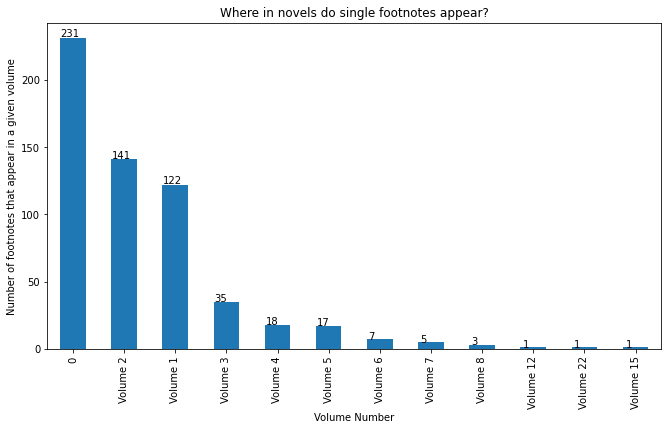

In [414]:
# Plot our single footnotes data as bar chart
ax = vol_dist_df.plot(kind='bar', figsize=(11,6), title="Where in novels do single footnotes appear?")
ax.set_xlabel("Volume Number")
ax.set_ylabel("Number of footnotes that appear in a given volume")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### In what volumes do these footnotes appear? (just multi-volume works)
Let's look at the same dataset, but filter out all the single-volume works, which appear as "0" in our dataset. 

In [415]:
#Let's drop the 0 values
multi_vol_dist_df = vol_dist_df[1:]

In [416]:
print('Where do single footnoes appear inv various volumes?')
multi_vol_dist_df

Where do single footnoes appear inv various volumes?


Volume 2     141
Volume 1     122
Volume 3      35
Volume 4      18
Volume 5      17
Volume 6       7
Volume 7       5
Volume 8       3
Volume 12      1
Volume 22      1
Volume 15      1
Name: Vol_Number, dtype: int64

### Plotting the position of single footnotes in multi-volume works within our one-footnote subset

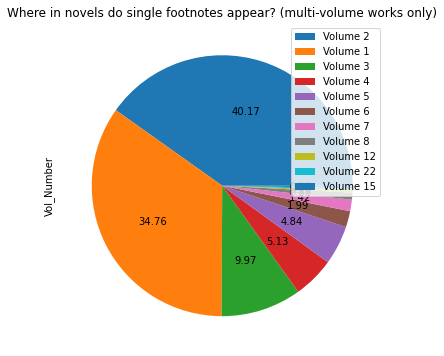

In [417]:
# Plot our single footnotes data as a pie chart
ax = multi_vol_dist_df.plot(kind='pie', autopct='%.2f', labels=None, figsize=(11,6), title="Where in novels do single footnotes appear? (multi-volume works only)")
ax.legend(loc=1, labels=multi_vol_dist_df.index) 


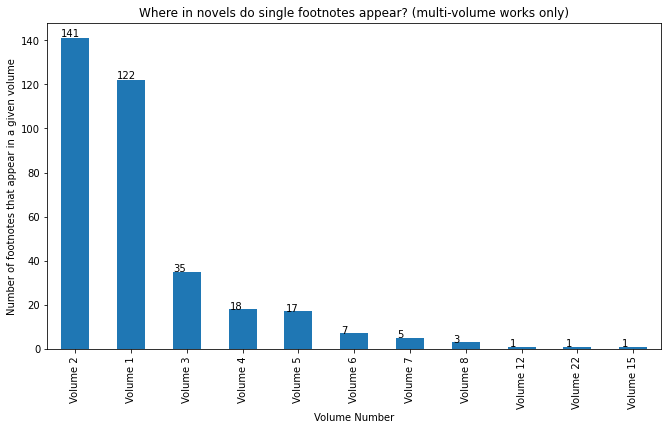

In [418]:
# Plot our single footnotes data as bar chart
ax = multi_vol_dist_df.plot(kind='bar', figsize=(11,6), title="Where in novels do single footnotes appear? (multi-volume works only)")
ax.set_xlabel("Volume Number")
ax.set_ylabel("Number of footnotes that appear in a given volume")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [419]:
# Let's compare these distributions with the general distribution of volumes
# What is the distribution of volumes in our one-footnote corpus that RB and NA have verfied have footnotes present?
print("Distriubtion of volumes in our one-footnote subset with footnotes present")
print ("(includes volumes that RB and NA have verfied DO have footnotes present, '0' = single volume):")
vol_dist_df

Distriubtion of volumes in our one-footnote subset with footnotes present
(includes volumes that RB and NA have verfied DO have footnotes present, '0' = single volume):


0            231
Volume 2     141
Volume 1     122
Volume 3      35
Volume 4      18
Volume 5      17
Volume 6       7
Volume 7       5
Volume 8       3
Volume 12      1
Volume 22      1
Volume 15      1
Name: Vol_Number, dtype: int64

In [420]:
# Now let's compare that to the one-footnote subset as a whole 
# (this includes volumes identified by computer vision as having footnotes that did not in facct have footnotes
print("Distriubtion of volumes in our one-footnote subset")
print("(includes ALL volumes identified by algorithm):")
one_footnote_df.Vol_Number.value_counts()

Distriubtion of volumes in our one-footnote subset
(includes ALL volumes identified by algorithm):


0            537
Volume 2     370
Volume 1     332
Volume 3     124
Volume 4      53
Volume 5      32
Volume 6      11
Volume 7      10
Volume 8       8
Volume 9       3
Volume 22      1
Volume 10      1
Volume 12      1
Volume 15      1
Name: Vol_Number, dtype: int64

In [421]:
print("Distriubtion of volumes in ECCO footnote corpus NOT in one-footnote subset:")
footnotes_df[footnotes_df['fn_pages'] != 1].Vol_Number.value_counts()

Distriubtion of volumes in ECCO footnote corpus NOT in one-footnote subset:


0            3247
Volume 1     1361
Volume 2     1305
Volume 3      489
Volume 4      331
Volume 5      111
Volume 6       78
Volume 7       58
Volume 8       41
Volume 9       17
Volume 10      16
Volume 11      10
Volume 12      10
Volume 14       7
Volume 16       7
Volume 17       6
Volume 13       6
Volume 18       5
Volume 15       5
Volume 19       4
Volume 23       2
Volume 21       2
Volume 20       2
Volume 24       1
Volume 22       1
Name: Vol_Number, dtype: int64

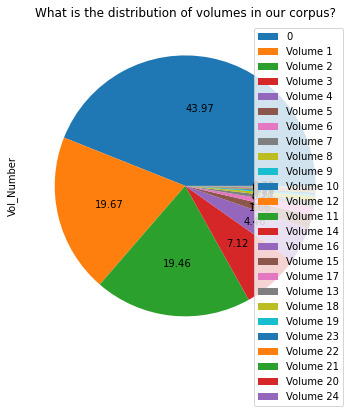

In [422]:

ax = footnotes_df.Vol_Number.value_counts().plot(kind='pie', autopct='%.2f', labels=None, figsize=(11,6), title="What is the distribution of volumes in our corpus?")
ax.legend(loc=1, labels=footnotes_df.Vol_Number.value_counts().index) 

### Statistical comparison of volume distribution in one-footnote subset with footnotes not in one-footnote subset

 Because we don't want to compare the one-footnote subset to the whole footnotes dataframe (which would muck up any attempt to run statistical tests to see if there's evidence of a difference, we're going to compare the distribution of volumes in our one footnote dataset to the corpus as a whole

In [423]:
from scipy import stats
from scipy.stats import chi2_contingency

In [424]:
# Let's make sure mark the absence of footnotes in volumes 9-11, 13, 14, 16-21, 23, 24)
vols_dist_in_one_footnote_corpus_with_footnotes_present = vol_dist_df
vols_dist_in_footnotes_corpus_excluding_one_footnote_subset = footnotes_df[footnotes_df['fn_pages'] != 1].Vol_Number.value_counts()

vols_dist_in_one_footnote_corpus_with_footnotes_present_series = pd.Series(vols_dist_in_one_footnote_corpus_with_footnotes_present)
vols_dist_in_footnotes_corpus_excluding_one_footnote_subset_series = pd.Series(vols_dist_in_footnotes_corpus_excluding_one_footnote_subset)
test_1 = vols_dist_in_one_footnote_corpus_with_footnotes_present

In [425]:
test_1.append(pd.Series(0, index=['Volume 9']))
test_1 = test_1.append(pd.Series(0, index=['Volume 9']))

In [426]:
test_1 = test_1.append(pd.Series(0, index=['Volume 10']))

In [427]:
test_1 = test_1.append(pd.Series(0, index=['Volume 11']))

In [428]:
test_1 = test_1.append(pd.Series(0, index=['Volume 13']))

In [429]:
test_1 = test_1.append(pd.Series(0, index=['Volume 14']))

In [430]:
test_1 = test_1.append(pd.Series(0, index=['Volume 16']))

In [431]:
test_1 = test_1.append(pd.Series(0, index=['Volume 17']))

In [432]:
test_1 = test_1.append(pd.Series(0, index=['Volume 18']))

In [433]:
test_1 = test_1.append(pd.Series(0, index=['Volume 19']))

In [434]:
test_1 = test_1.append(pd.Series(0, index=['Volume 20']))

In [435]:
test_1 = test_1.append(pd.Series(0, index=['Volume 21']))

In [436]:
test_1 = test_1.append(pd.Series(0, index=['Volume 23']))

In [437]:
test_1 = test_1.append(pd.Series(0, index=['Volume 24']))

In [438]:
vols_dist_in_one_footnote_corpus_with_footnotes_present = test_1

#### ANOVA (Analysis of Variance)
The standard threshold for confidence in variance is a p-value of < 0.05 

If the p-value:
- P-value <0.001: Strong certainty in the result
-    P-value <0.05:  Moderate certainty in the result
-    P-value <0.1: Weak certainty in the result
-    P-value > 0.1: No certainty in the result

In [439]:
f_val, p_val = stats.f_oneway(vols_dist_in_one_footnote_corpus_with_footnotes_present, vols_dist_in_footnotes_corpus_excluding_one_footnote_subset)
print("One-way ANOVA test comparing one-footnote subset with ECCO footnotes corpus")
print("p-value:", p_val)

One-way ANOVA test comparing one-footnote subset with ECCO footnotes corpus
p-value: 0.07639554887351713


### What this means: 
We have *weak* statistical evidence. If we set our standard of significance at 5%, this would fall below statistical significance. If we set level of significance at 10%, then this *would* be statistically significant.

### Let's run some other tests:
#### T-Test
This is just another way of running the t-test (which the ANOVA test is a version of). Again,  standard threshold for difference is 0.05.

In [440]:
stats.ttest_ind(vols_dist_in_footnotes_corpus_excluding_one_footnote_subset, vols_dist_in_one_footnote_corpus_with_footnotes_present)

Ttest_indResult(statistic=1.8110372002869037, pvalue=0.07639554887351713)

#### Pearson's Test
If  the correltation coefficient is close to +1: Large Positive relationship,  close to -1: Large Negative relationship is close to 0: No relationship.

In [441]:
vols_dist_in_footnotes_corpus_excluding_one_footnote_subset = footnotes_df[footnotes_df['fn_pages'] != 1].Vol_Number.value_counts()
#vols_dist_in_one_footnote_corpus_with_footnotes_present = vol_dist_df 

In [442]:
print("Correlation coefficient and p-value comparing one-footnote subset with ECCO footnotes corpus:")
stats.pearsonr(vols_dist_in_footnotes_corpus_excluding_one_footnote_subset, vols_dist_in_one_footnote_corpus_with_footnotes_present)

Correlation coefficient and p-value comparing one-footnote subset with ECCO footnotes corpus:


(0.9853346738182929, 3.628243739690661e-19)

#### Chi-Squared

In [443]:
vols_dist_in_one_footnote_corpus_with_footnotes_present_series = pd.Series(vols_dist_in_one_footnote_corpus_with_footnotes_present)
vols_dist_in_footnotes_corpus_excluding_one_footnote_subset_series = pd.Series(vols_dist_in_footnotes_corpus_excluding_one_footnote_subset)

In [444]:
import numpy as np

In [445]:
array1 = np.array([vols_dist_in_one_footnote_corpus_with_footnotes_present_series]) 
array2 = np.array([vols_dist_in_footnotes_corpus_excluding_one_footnote_subset_series])
final_array = np.concatenate((array1, array2))

print(final_array)

[[ 231  141  122   35   18   17    7    5    3    1    1    1    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [3247 1361 1305  489  331  111   78   58   41   17   16   10   10    7
     7    6    6    5    5    4    2    2    2    1    1]]


In [446]:

chi2, p, dof, expected = chi2_contingency(final_array)

In [447]:
print("Chi2 Test for volumes distribution in general footnotes corpus and one-footnote subset")
print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

Chi2 Test for volumes distribution in general footnotes corpus and one-footnote subset
chi2 statistic:     27.906
p-value:            0.26405
degrees of freedom: 24
expected frequencies:
[[2.62746106e+02 1.13468847e+02 1.07802960e+02 3.95856698e+01
  2.63652648e+01 9.66978193e+00 6.42133956e+00 4.75934579e+00
  3.32398754e+00 1.35981308e+00 1.28426791e+00 8.30996885e-01
  7.55451713e-01 5.28816199e-01 5.28816199e-01 4.53271028e-01
  4.53271028e-01 3.77725857e-01 3.77725857e-01 3.02180685e-01
  1.51090343e-01 1.51090343e-01 1.51090343e-01 7.55451713e-02
  7.55451713e-02]
 [3.21525389e+03 1.38853115e+03 1.31919704e+03 4.84414330e+02
  3.22634735e+02 1.18330218e+02 7.85786604e+01 5.82406542e+01
  4.06760125e+01 1.66401869e+01 1.57157321e+01 1.01690031e+01
  9.24454829e+00 6.47118380e+00 6.47118380e+00 5.54672897e+00
  5.54672897e+00 4.62227414e+00 4.62227414e+00 3.69781931e+00
  1.84890966e+00 1.84890966e+00 1.84890966e+00 9.24454829e-01
  9.24454829e-01]]


In [448]:
one_footnote_present = one_footnote_df[one_footnote_df['footnotes_present'] == 1]

In [449]:
one_footnote_present[one_footnote_present['Vol_Number'] == 'Volume 2']

,Unnamed: 0,Filename,DocumentID,ESTC_ID,Date,Title,Vol_Number,Author,Imprint,Field_Headings,fn_pages,nofn_pages,TableName,fn.percent,decade,footnotes_present
10,476,0000500202.xml,500202,T131172,1765,"Lettres de Sophie et du Chevalier de **, pour servir de suppl<c3><a9>ment aux Lettres du Marquis...",Volume 2,"Desfontaines, M. (Guillaume Fran<c3><a7>ois Fouques Deshayes)","A Londres : et se trouvent <c3><a0> Paris, chez L'Esclapart, Libraire, Quai de G<c3><aa>vres, M....","Epistolary fiction, French, Early works to 1800",1,278,Manifest_LitAndLang1,0.003584,1760,1
13,483,0000500702.xml,500702,T131197,1759,"Female banishment: or, the woman hater. Originally wrote by the Chevalier de Mouhy, ... In two v...",Volume 2,"Mouhy, Charles de Fieux, chevalier de","London : printed for T. Lownds, 1759.","Exile (Punishment), Early works to 1800, Women, Early works to 1800",1,296,Manifest_LitAndLang1,0.003367,1750,1
25,524,0000900502.xml,900502,T129718,1794,"The confessions of James Baptiste Couteau, citizen of France, written by himself: and translated...",Volume 2,"Jephson, Robert","London : printed for J. Debrett, 1794.","France, History, Revolution, 1789-1799, Fiction",1,239,Manifest_LitAndLang1,0.004167,1790,1
30,543,0001100402.xml,1100402,T100068,1769,The farmer's son of Kent. A tale. In two volumes. ...,Volume 2,Anon,"London : printed for Francis Noble, at his Circulating Library near Middle Row, Holborn; and Joh...","English fiction, 18th century",1,234,Manifest_LitAndLang1,0.004255,1760,1
34,564,0001300602.xml,1300602,T098006,1767,"Le ministre de Wakefield, histoire suppos<c3><a9>e <c3><a9>crite par lui-m<c3><aa>me. ...",Volume 2,"Goldsmith, Oliver","Londres [i.e. Paris?] : chez Pissot, Desaint, 1767.","France, History, 18th century, France, Politics and government, 18th century",1,240,Manifest_LitAndLang1,0.004149,1760,1
49,634,0005300302.xml,5300302,T072280,1753,"The life and strange surprising adventures of Robinson Crusoe; of York, mariner: who lived eight...",Volume 2,"Defoe, Daniel","London : printed for T. and T. Longman, C. Hitch and L. Hawes, J. Hodges, B. Dod, J. and J. Rivi...","Survival after airplane accidents, shipwrecks, etc., Fiction",1,282,Manifest_LitAndLang1,0.003534,1750,1
53,645,0005400502.xml,5400502,T092965,1762,"The country seat; or, summer evenings entertainments. Translated from the French. In two volumes...",Volume 2,Anon,"London : printed: and sold by T. Lownds in Fleet Street, MDCCLXII. [1762].","French fiction, 18th century, Translations into English",1,233,Manifest_LitAndLang1,0.004274,1760,1
56,658,0005500302.xml,5500302,T129707,1792,Cyanna of Athens. A Grecian romance. In two volumes. ... From the French of the Baron de Bilderbec.,Volume 2,"Bilderbeck, Ludwig Benedict Franz, Freiherr von","London : printed for T. Axtell, 1792.","Greek fiction, Translations into English, 18th century",1,180,Manifest_LitAndLang1,0.005525,1790,1
69,5118,0006001102.xml,6001102,T093334,1795,Memoirs of Madame de Barneveldt. Translated from the French by Miss Gunning. In two volumes. ...,Volume 2,"Auvigny, M. d' (Jean Du Castre)","London : printed by and for S. Low, Berwick Street, Soho; and E. Booker, New Bond Street, 1795.","Auvigny,, M. d, (Jean Du Castre),, 1712-1743, Biography, Early works to 1800",1,328,Manifest_LitAndLang2,0.003040,1790,1
79,778,0006500102.xml,6500102,T138418,1797,James the fatalist and his master. Translated from the French of Diderot. In three volumes. ...,Volume 2,"Diderot, Denis","London : printed for G. G. and J. Robinson, 1797.","Free will and determinism, Fiction",1,295,Manifest_LitAndLang1,0.003378,1790,1


## Footnote positions in END data
Data source: The 2018 END dataset paratext data: https://github.com/earlynovels/end-dataset/blob/master/end-dataset-master-11282018/11282018-full-paratexts.tsv 

In [450]:
# Import the tsv file
END_footnotes_data = pd.read_csv('../11282018-full-paratexts.txt',  sep='\t')

In [451]:
END_footnotes_data['type'].value_counts()

['Footnotes']                                                                    271
['Preface']                                                                      244
['Table of contents']                                                            213
['Errata']                                                                       124
['Dedication']                                                                   114
['Advertisement']                                                                 83
['Introduction']                                                                  69
['Footnote']                                                                      67
['To the Reader']                                                                 55
['Note']                                                                          52
['Colophon']                                                                      51
['Poem']                                                         

In [452]:
#Filter to include just footnote paratexts
END_footnotes_data_just_footnotes = END_footnotes_data[END_footnotes_data['type'].str.contains('Foot').fillna(False)]

### Where are footnotes positioned within volumes?

In [453]:
print("Location of footnotes within END volumes:")
END_footnotes_data_just_footnotes.position.value_counts()

Location of footnotes within END volumes:


['Middle']                                                                              301
['Front']                                                                                15
['Back']                                                                                  9
['Front', 'Middle']                                                                       8
['Front', 'Middle', 'Back']                                                               2
['Middle, page 92']                                                                       1
['Middle', 'Some provide commentary on narrative; others seem to be indexing tools']      1
['Middle', 'Back']                                                                        1
Name: position, dtype: int64

#### What does "Middle" mean for END catalogers?

In [454]:
END_footnotes_data_just_footnotes.notes.value_counts()

['pp. 24, 65,']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

### Extracting the numerical data from these END catalog notes

In [455]:
# Extract just the 1-3 digit numbers 
# NOTE: this method will also end up catching *VOLUME NUMBERS* (e.g. the "2" in "v.2") 
#  see later section on plotting for how we handle the 76 instances of volume numbers
END_footnotes_data_just_footnotes.notes.str.findall(r'[0-9]{1,3}')
END_footnotes_data_just_digits = END_footnotes_data_just_footnotes.notes.str.findall(r'[0-9]{1,3}')

In [456]:
# Let's look at just the roman numerals in the page numbers 
# NOTE: we'll also expect to see 'v's" from the volume markers
# see later section on how why the "v's" are removed
END_footnotes_data_just_footnotes.notes.str.findall(r'(?i)\b(?=[ivxlcdm]+)M{0,4}(?:CM|CD|D?C{0,3})(?:XC|XL|L?X{0,3})(?:IX|IV|V?I{0,3})\b')

230                                                                                                      []
240                                                                                                      []
285                                                                                                      []
301                                                                                                      []
312                                                                                                    [, ]
319                                                                                                      []
339                                                                                                  [, , ]
348                                                                                                      []
370                                                                                                      []
390                         

In [457]:
END_footnotes_data_just_roman_numerals = END_footnotes_data_just_footnotes.notes.str.findall(r'(?i)\b(?=[ivxlcdm]+)M{0,4}(?:CM|CD|D?C{0,3})(?:XC|XL|L?X{0,3})(?:IX|IV|V?I{0,3})\b')

In [458]:
END_footnotes_data_just_digits

230                                                                                                    [64]
240                                                                                                      []
285                                                                                                    [61]
301                                                                                                      []
312                                                                                                      []
319                                                                                                      []
339                                                                                                      []
348                                                                                                      []
370                                                                                                     [3]
390                         

In [459]:
END_footnotes_data_just_digits.to_csv('END_footnotes_data_just_digits.csv')

In [460]:
END_footnotes_data_just_digits_cleaned = pd.read_csv('END_footnotes_data_just_digits-cleaned.csv', encoding='utf-8')

In [461]:
END_footnotes_data_just_digits_cleaned['notes'] = END_footnotes_data_just_digits_cleaned.notes.dropna()

In [462]:
END_footnotes_data_just_digits_cleaned['notes'] = END_footnotes_data_just_digits_cleaned.notes.dropna().astype(int)

In [463]:
END_footnotes_data_just_digits_cleaned = END_footnotes_data_just_digits_cleaned.dropna()

In [464]:
END_footnotes_data_just_digits_cleaned['notes'] = END_footnotes_data_just_digits_cleaned['notes'].astype(int)

In [465]:
END_footnotes_data_just_digits_cleaned

,Column,notes
0,230,64
2,285,61
8,370,3
14,524,243
15,579,3
...,...,...
2678,1656,67
2679,1656,105
2680,1656,127
2681,1656,195


In [466]:
# Import in file cleaned in open refine to r# Import in file cleaned in open refine to remove uppercase roman numerals (volume numbers) and extra characters
END_footnotes_data_just_roman_numerals.to_csv('END_footnotes_data_roman_numerals.csv')

In [467]:
END_footnotes_data_just_roman_numerals_cleaned = pd.read_csv('END_footnotes_data_roman_numerals-cleaned.csv', encoding='utf-8')

In [468]:
END_footnotes_data_just_roman_numerals_cleaned = END_footnotes_data_just_roman_numerals_cleaned.dropna()

In [469]:
# Notice how 'v' is much higher–– this is likely due to END catalogers writing "v.1" or v2" 
END_footnotes_data_just_roman_numerals_cleaned['notes'].value_counts().head(5)

v      83
vii     6
iv      5
xi      5
xii     4
Name: notes, dtype: int64

In [470]:
# Dropping the "v's" from our roman numerals data, since the majority of these refer to VOLUME not page numbers
END_footnotes_data_just_roman_numerals_cleaned = END_footnotes_data_just_roman_numerals_cleaned[END_footnotes_data_just_roman_numerals_cleaned['notes'] != 'v']

In [471]:
END_footnotes_data_just_digits_cleaned.notes.dtype

dtype('int64')

In [472]:
END_footnotes_data_just_roman_numerals_cleaned.head()

,Column,notes
0,585,vii
1,585,xii
2,587,iv
4,587,xi
5,587,xii


In [473]:
END_footnotes_data_all_page_numbers_cleaned = END_footnotes_data_just_digits_cleaned.append(END_footnotes_data_just_roman_numerals_cleaned)

In [474]:
END_footnotes_data_all_page_numbers_cleaned

,Column,notes
0,230,64
2,285,61
8,370,3
14,524,243
15,579,3
...,...,...
154,1627,xi
155,1627,xiv
156,1657,vii
157,1657,ix


### Locations of footnotes within END volumes

In [475]:
print("Page Number, count")
END_footnotes_data_all_page_numbers_cleaned.notes.value_counts()

Page Number, count


2         54
1         50
3         39
8         33
5         31
4         29
9         28
7         22
49        17
178       16
72        15
65        15
126       15
137       15
153       15
22        15
70        14
148       14
61        13
57        13
37        13
145       13
11        13
15        13
189       13
6         13
50        12
142       12
44        12
54        12
129       12
56        12
59        12
35        12
164       12
185       12
113       12
28        12
214       12
24        12
182       12
20        12
10        11
232       11
67        11
79        11
128       11
92        11
130       11
90        11
218       11
85        11
21        11
216       11
173       11
43        11
23        11
86        11
30        11
209       10
217       10
211       10
69        10
76        10
235       10
75        10
177       10
81        10
186       10
166       10
12        10
207       10
19        10
127       10
225       10
114        9
94         9

### Top 25 locations for footnotes in END volumes 

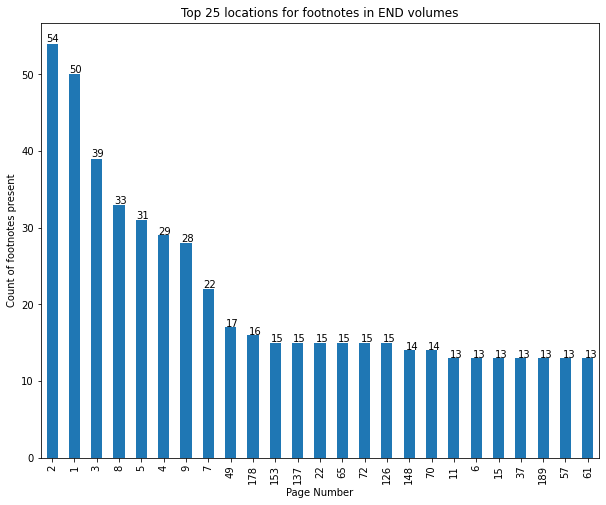

In [476]:
ax = END_footnotes_data_just_digits_cleaned.notes.value_counts().head(25).plot(kind='bar', title ='Top 25 locations for footnotes in END volumes', figsize=(10,8))
ax.set_xlabel("Page Number")
ax.set_ylabel("Count of footnotes present")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [477]:
print("Top 25 locations for footnotes in END volumes")
print("")
print("Page Number, count")
END_footnotes_data_all_page_numbers_cleaned.notes.value_counts().head(25)

Top 25 locations for footnotes in END volumes

Page Number, count


2      54
1      50
3      39
8      33
5      31
4      29
9      28
7      22
49     17
178    16
72     15
65     15
126    15
137    15
153    15
22     15
70     14
148    14
61     13
57     13
37     13
145    13
11     13
15     13
189    13
Name: notes, dtype: int64

In [478]:
# It looks like the first 10 pages have higher amounts of recorded footnotes-–let's confirm this 
# Let's create a new data column binning our footnote data into 10-page chunks and catch-all categories for volumes with 300+pages
page_number_categories = []
for page_number in END_footnotes_data_all_page_numbers_cleaned['notes']:
    if type(page_number) == int:
        if 0 < page_number < 10:
             page_number_categories.append("001s")
        elif 20 > page_number >= 10:
            page_number_categories.append("010s")
        elif 30 > page_number >= 20:
            page_number_categories.append("020s")
        elif 40 > page_number >= 30:
            page_number_categories.append("030s")
        elif 50 > page_number >= 40:
            page_number_categories.append("040s")
        elif 60 > page_number >= 50:
            page_number_categories.append("050s")
        elif 70 > page_number >= 60:
            page_number_categories.append("060s")
        elif 80 > page_number >= 70: 
            page_number_categories.append("070s")
        elif 90 > page_number >= 80:
            page_number_categories.append("080s")
        elif 100 > page_number >= 90:
            page_number_categories.append("090s")
        elif 110 > page_number >= 100:
            page_number_categories.append("100s")
        elif 120 > page_number >= 110:
             page_number_categories.append("110s")
        elif 130 > page_number >= 120:
            page_number_categories.append("120s")
        elif 140 > page_number >= 130:
            page_number_categories.append("130s")
        elif 150 > page_number >= 140:
            page_number_categories.append("140s")
        elif 160 > page_number >= 150:
            page_number_categories.append("150s")
        elif 170 > page_number >= 160:
            page_number_categories.append("160s")
        elif 180 > page_number >= 170: 
            page_number_categories.append("170s")
        elif 190 > page_number >= 180:
            page_number_categories.append("180s")
        elif 200 > page_number >= 190:
            page_number_categories.append("190s")
        elif 210 > page_number >= 200:
            page_number_categories.append("200s")
        elif 220 > page_number >= 210:
            page_number_categories.append("210s")
        elif 230 > page_number >= 220:
            page_number_categories.append("220s")
        elif 240 > page_number >= 230:
            page_number_categories.append("230s")
        elif 250 > page_number >= 240:
            page_number_categories.append("240s")
        elif 260 > page_number >= 250:
            page_number_categories.append("250s")
        elif 270 > page_number >= 260:
            page_number_categories.append("260s")
        elif 280 > page_number >= 270: 
            page_number_categories.append("270s")
        elif 290 > page_number >= 280:
            page_number_categories.append("280s")
        elif 300 > page_number >= 290:
            page_number_categories.append("290s")
        elif 310 > page_number >= 300:
            page_number_categories.append("300s")
        elif 320 > page_number >= 310:
            page_number_categories.append("310s")
        elif 330 > page_number >= 320:
            page_number_categories.append("320s")
        elif 340 > page_number >= 330:
            page_number_categories.append("330s")
        elif 350 > page_number >= 340:
            page_number_categories.append("340s")
        elif 360 > page_number >= 350:
            page_number_categories.append("350s")
        elif 370 > page_number >= 360:
            page_number_categories.append("360s")
        elif 380 > page_number >= 370: 
            page_number_categories.append("370s")
        elif 390 > page_number >= 380:
            page_number_categories.append("380s")
        elif 400 > page_number >= 390:
            page_number_categories.append("390s")
        elif 500 > page_number >= 400:
            page_number_categories.append("400s")
        elif 600 > page_number >= 500:
            page_number_categories.append("500s")
        elif page_number >= 600:
            page_number_categories.append("600s+")
    else:
        page_number_categories.append("000-Frontmatter")

In [479]:
END_footnotes_data_all_page_numbers_cleaned['page_number_categories'] = page_number_categories

### Plotting locations for footnotes in END volumes, binning by 10

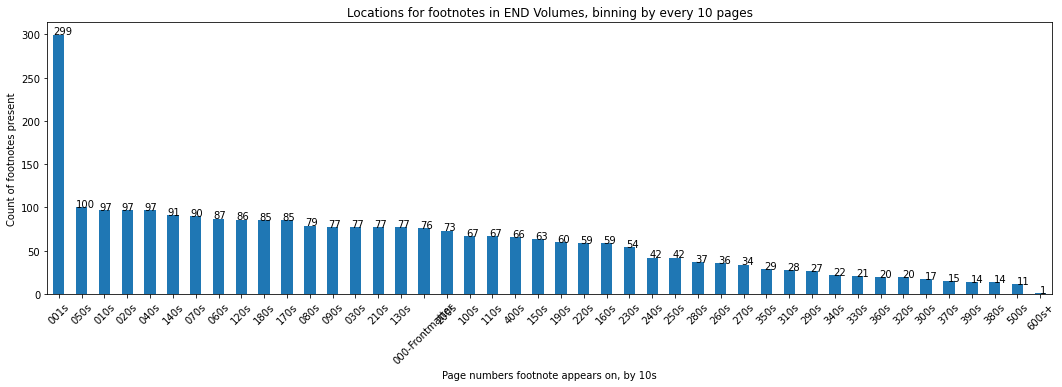

In [480]:
ax = END_footnotes_data_all_page_numbers_cleaned.page_number_categories.value_counts()\
.plot(kind='bar', rot=45, figsize=(18,5), title="Locations for footnotes in END Volumes, binning by every 10 pages")
ax.set_xlabel("Page numbers footnote appears on, by 10s")
ax.set_ylabel("Count of footnotes present")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

**NOTES ON THE ABOVE CHART:** The above numbers need to be qualified somewhat: 76 of the page numbers that appear to be in the "1s" category are the product of volume numbers in the cataloger notes -- eg "v.3" (see [full text of cataloger notes here](#What-does-"Middle"-mean-for-END-catalogers?)). 

This would mean there are **223** (not 299) **footnotes that appear in pages 1-10**.

Even so, if we include the number of footnotes that appear on pages paginated with Roman numerals (appearing in the prefatory matter), that would be **299 footnotes that appear in the first ten pages and in the prefatory material of the novel**, three times the amount that appear in any other 10 page chunk of the text.

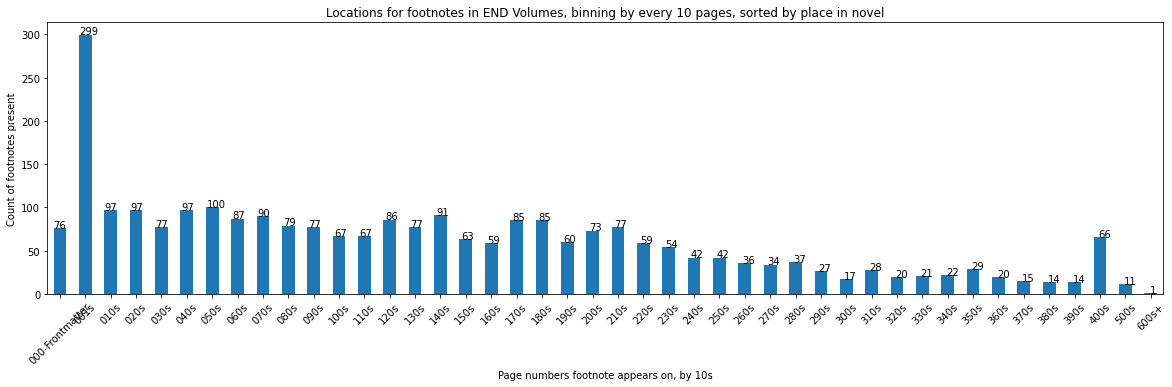

In [481]:
ax = END_footnotes_data_all_page_numbers_cleaned.page_number_categories.value_counts().sort_index()\
.plot(kind='bar', rot=45, figsize=(20,5), title="Locations for footnotes in END Volumes, binning by every 10 pages, sorted by place in novel")
ax.set_xlabel("Page numbers footnote appears on, by 10s")
ax.set_ylabel("Count of footnotes present")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))